# Сборный проект - 2 HR-аналитика

# Описание проекта 

HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. В этом HR-аналитикам пригодится машинное обучение, с помощью которого получится быстрее и точнее отвечать на вопросы бизнеса.
Компания предоставила данные с характеристиками сотрудников компании. Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён. 
Собирать данные такими опросниками не так легко: компания большая, и всех сотрудников надо сначала оповестить об опросе, а затем проследить, что все его прошли. 
У вас будет несколько задач. Первая — построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. 
Почему бизнесу это важно: удовлетворённость работой напрямую влияет на отток сотрудников. А предсказание оттока — одна из важнейших задач HR-аналитиков. Внезапные увольнения несут в себе риски для компании, особенно если уходит важный сотрудник.
Ваша вторая задача — построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

# Задача 1 предсказание уровня удовлетворённости сотрудника

# Входные данные

id — уникальный идентификатор сотрудника;
dept — отдел, в котором работает сотрудник;
level — уровень занимаемой должности;
workload — уровень загруженности сотрудника;
employment_years — длительность работы в компании (в годах);
last_year_promo — показывает, было ли повышение за последний год;
last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;
supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;
salary — ежемесячная зарплата сотрудника;
job_satisfaction_rate — уровень удовлетворённости сотрудника работой в компании, целевой признак.

# Путь решения задачи:

Шаг 1. Загрузка данных
Шаг 2. Предобработка данных
Шаг 3. Исследовательский анализ данных
Шаг 4. Подготовка данных
Шаг 5. Обучение моделей
Шаг 6. Оформление выводов

# Задача 2 предсказание увольнения сотрудника из компании

# Входные данные

Входные данные те же, Однако целевой признак отличается: это quit — увольнение сотрудника из компании.

# Путь решения задачи:

Шаг 1. Загрузка данных
Шаг 2. Предобработка данныз
Шаг 3. Исследовательский анализ данных
Шаг 4. Добавление нового входного признака
Шаг 5. Подготовка данных
Шаг 6. Обучение модели
Шаг 7. Выводы

# Задача 1

## Шаг 1. Загрузка данных

In [1]:
!pip install phik
!pip install scikit-learn -U

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import phik
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer 
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,RandomForestRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [3]:
#загрузим и прочитаем Тренировочную выборку: train_quit.csv
train_job = pd.read_csv('/datasets/train_job_satisfaction_rate.csv')
train_job.head()

id        dept   level workload  employment_years last_year_promo  \
0  155278       sales  junior   medium                 2              no   
1  653870          hr  junior     high                 2              no   
2  184592       sales  junior      low                 1              no   
3  171431  technology  junior      low                 4              no   
4  693419          hr  junior   medium                 1              no   

  last_year_violations  supervisor_evaluation  salary  job_satisfaction_rate  
0                   no                      1   24000                   0.58  
1                   no                      5   38400                   0.76  
2                   no                      2   12000                   0.11  
3                   no                      2   18000                   0.37  
4                   no                      3   22800                   0.20

In [4]:
train_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


In [5]:
#загрузим и прочитаем входные признаки тестовой выборки test_features
test_features = pd.read_csv('/datasets/test_features.csv')
test_features.head()

id       dept   level workload  employment_years last_year_promo  \
0  485046  marketing  junior   medium                 2              no   
1  686555         hr  junior   medium                 1              no   
2  467458      sales  middle      low                 5              no   
3  418655      sales  middle      low                 6              no   
4  789145         hr  middle   medium                 5              no   

  last_year_violations  supervisor_evaluation  salary  
0                   no                      5   28800  
1                   no                      4   30000  
2                   no                      4   19200  
3                   no                      4   19200  
4                   no                      5   40800

In [6]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


In [7]:
#загрузим и прочитаем целевой признак тестовой выборки test_target_job_satisfaction_rate
test_target = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')
test_target.head()

id  job_satisfaction_rate
0  130604                   0.74
1  825977                   0.75
2  418490                   0.60
3  555320                   0.72
4  826430                   0.08

In [8]:
test_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


На данном этапе загрузили все необходимые библиотеки, загрузили и прочитали данные

## Шаг 2. Предобработка данных

In [9]:
train_job.set_index('id', inplace=True)
test_features.set_index('id', inplace=True)
test_target.set_index('id', inplace=True)

In [10]:
#проверяем пропуски train_job
train_job.isna().sum()

dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64

In [11]:
#проверяем пропуски test_features
test_features.isna().sum()

dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64

In [12]:
#проверяем пропуски test_target
test_target.isna().sum()

job_satisfaction_rate    0
dtype: int64

In [13]:
#проверяем дубликаты в train_job
train_job.duplicated().sum()

245

In [14]:
#удалим дубликаты тренировочной выборки train_job
train_job.drop_duplicates(inplace=True)

In [15]:
#проверяем дубликаты в test_features
test_features.duplicated().sum()

557

In [16]:
#проверяем дубликаты в test_target
test_target.duplicated().sum()

1902

посмотрим уникальные значения всех столбцов

In [17]:
#выведем уникальные значения
train_job['level'].unique()

array(['junior', 'middle', 'sinior', nan], dtype=object)

In [18]:
#Поменяем название в столбцн level
train_job['level'] = train_job['level'].str.replace('sinior','senior',  regex=True)

In [19]:
#выведем уникальные значения
train_job['level'].unique()

array(['junior', 'middle', 'senior', nan], dtype=object)

In [20]:
#Проверяем количество уникальных значений
train_job['level'].value_counts()

junior    1699
middle    1695
senior     357
Name: level, dtype: int64

In [21]:
#выведем уникальные значения
train_job['dept'].unique()

array(['sales', 'hr', 'technology', 'purchasing', 'marketing', nan],
      dtype=object)

In [22]:
#В столбце dept есть пропуски, заменим их
train_job.loc[train_job['dept'] == ' ','dept'] = np.nan

In [23]:
#Проверяем количество уникальных значений
train_job['dept'].value_counts()

sales         1374
technology     818
purchasing     586
marketing      531
hr             440
Name: dept, dtype: int64

In [24]:
#выведем уникальные значения
train_job['workload'].unique()

array(['medium', 'high', 'low'], dtype=object)

In [25]:
#Проверяем количество уникальных значений
train_job['workload'].value_counts()

medium    1908
low       1125
high       722
Name: workload, dtype: int64

In [26]:
#выведем уникальные значения
train_job['last_year_promo'].unique()

array(['no', 'yes'], dtype=object)

In [27]:
#Проверяем количество уникальных значений
train_job['last_year_promo'].value_counts()

no     3635
yes     120
Name: last_year_promo, dtype: int64

In [28]:
#выведем уникальные значения
train_job['last_year_violations'].unique()

array(['no', 'yes'], dtype=object)

In [29]:
#Проверяем количество уникальных значений
train_job['last_year_violations'].value_counts()

no     3202
yes     553
Name: last_year_violations, dtype: int64

In [30]:
train_job.shape,test_features.shape,test_target.shape

((3755, 9), (2000, 8), (2000, 1))

### Вывод
Первично изучили все датафреймы. Были обнаружены некотрые пропуски, пока их трогать не будем. В тренировочной выборке были обнаружены дубликаты и удалены. В тестовых выборках дубликаты удалять не будем, они не повлияют на качество модели

## Шаг 3. Исследовательский анализ данных 

In [31]:
train_job.describe()

employment_years  supervisor_evaluation        salary  \
count       3755.000000            3755.000000   3755.000000   
mean           3.817044               3.463648  34457.416778   
std            2.557142               1.026265  15050.643870   
min            1.000000               1.000000  12000.000000   
25%            2.000000               3.000000  22800.000000   
50%            3.000000               4.000000  31200.000000   
75%            6.000000               4.000000  44400.000000   
max           10.000000               5.000000  98400.000000   

       job_satisfaction_rate  
count            3755.000000  
mean                0.532554  
std                 0.226393  
min                 0.030000  
25%                 0.350000  
50%                 0.550000  
75%                 0.710000  
max                 1.000000

In [32]:
test_features.describe()

employment_years  supervisor_evaluation        salary
count       2000.000000            2000.000000   2000.000000
mean           3.666500               3.526500  34066.800000
std            2.537222               0.996892  15398.436729
min            1.000000               1.000000  12000.000000
25%            1.000000               3.000000  22800.000000
50%            3.000000               4.000000  30000.000000
75%            6.000000               4.000000  43200.000000
max           10.000000               5.000000  96000.000000

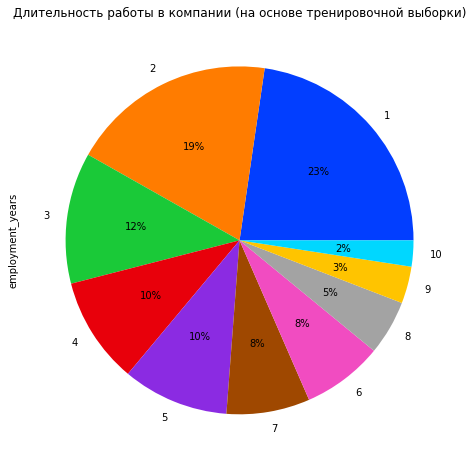

In [33]:
# построим график распределения длительности работы в компании на основе тренировочной выборки
palette_color = sn.color_palette('bright') 
train_job['employment_years'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%',
                                                  title = 'Длительность работы в компании (на основе тренировочной выборки)',
                                                  colors = palette_color, figsize = (15, 8))
plt.show()

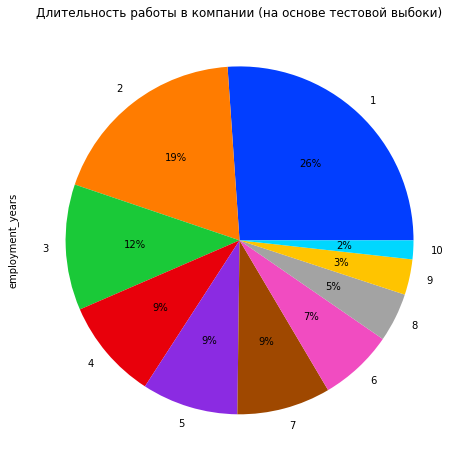

In [34]:
# построим график распределения длительности работы в компании на основе тестовой выборки
palette_color = sn.color_palette('bright') 
test_features['employment_years'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%',
                                               title = 'Длительность работы в компании (на основе тестовой выбоки)',
                                               colors = palette_color, figsize = (15, 8))
plt.show()

Далее построим гистограмму распределения и диаграмму размаха по ежемесячной зарплате на основе тренировочной выборки train_job

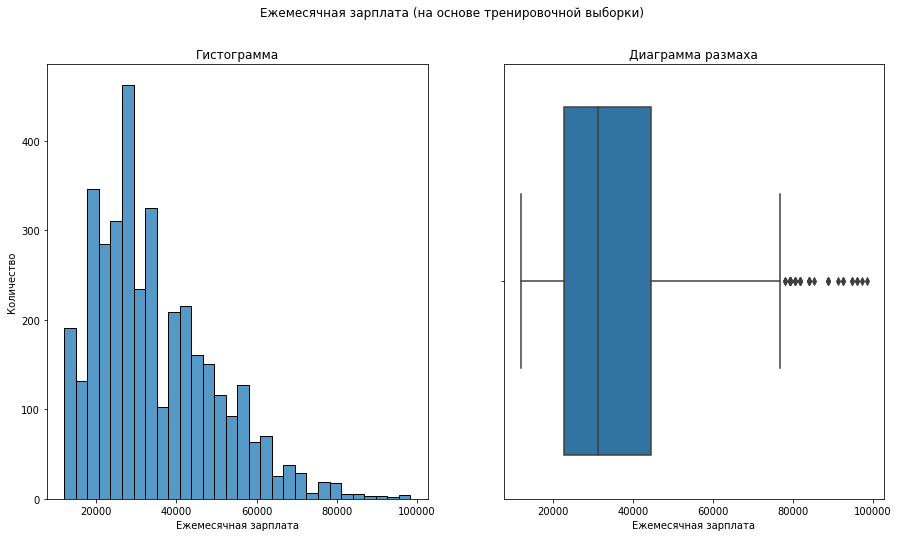

In [35]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (15,8))
sn.histplot(data = train_job,x = 'salary', ax=axs[0], bins = 30)
axs[0].set_xlabel('Ежемесячная зарплата')
axs[0].set_ylabel('Количество')
axs[0].set_title('Гистограмма')
sn.boxplot(data = train_job,x = 'salary', ax=axs[1])
axs[1].set_xlabel('Ежемесячная зарплата')
axs[1].set_title('Диаграмма размаха')
fig.suptitle('Ежемесячная зарплата (на основе тренировочной выборки)')
plt.show()

Далее построим гистограмму распределения и диаграмму размаха по ежемесячной зарплате на основе тестовой выборки test_features

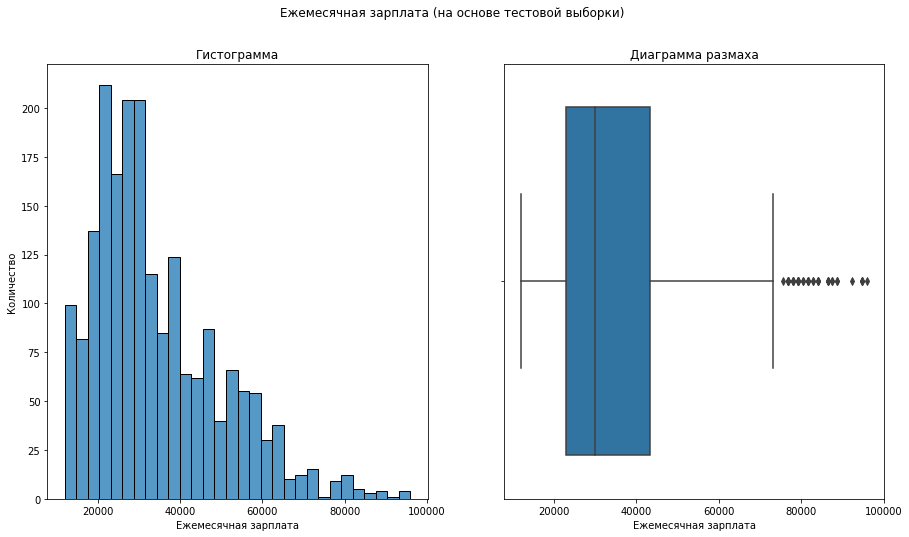

In [36]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (15,8))
sn.histplot(data = test_features,x = 'salary', ax=axs[0], bins = 30)
axs[0].set_xlabel('Ежемесячная зарплата')
axs[0].set_ylabel('Количество')
axs[0].set_title('Гистограмма')
sn.boxplot(data = test_features,x = 'salary', ax=axs[1])
axs[1].set_xlabel('Ежемесячная зарплата')
axs[1].set_title('Диаграмма размаха')
fig.suptitle('Ежемесячная зарплата (на основе тестовой выборки)')
plt.show()

Далее поработаем с признаком удовлетворенность сотрудника работой. Для начала на тренировочной выборке

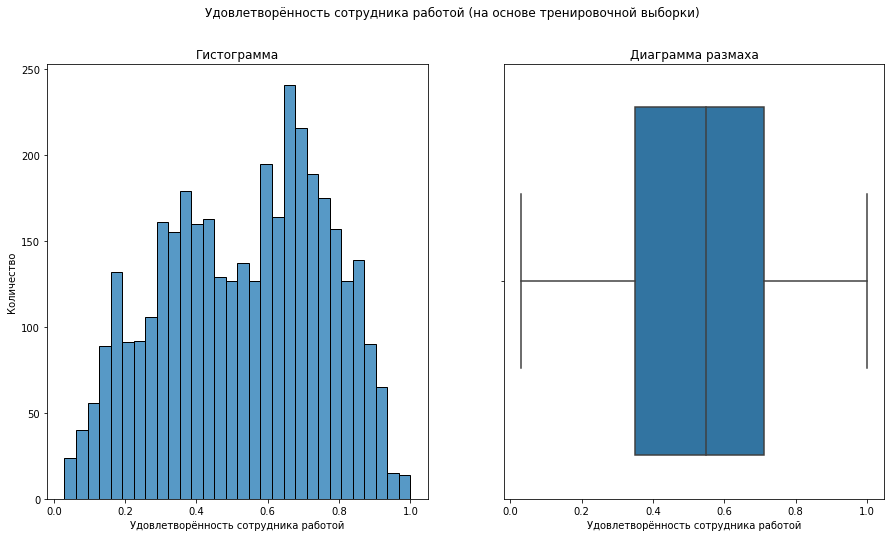

In [37]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (15,8))
sn.histplot(data = train_job,x = 'job_satisfaction_rate', ax=axs[0], bins = 30)
axs[0].set_xlabel('Удовлетворённость сотрудника работой')
axs[0].set_ylabel('Количество')
axs[0].set_title('Гистограмма')
sn.boxplot(data = train_job,x = 'job_satisfaction_rate', ax=axs[1])
axs[1].set_xlabel('Удовлетворённость сотрудника работой')
axs[1].set_title('Диаграмма размаха')
fig.suptitle('Удовлетворённость сотрудника работой (на основе тренировочной выборки)')
plt.show()

Далее изучим признак удовлетворенность сотрудника работой на основе тестовой выборки test_target

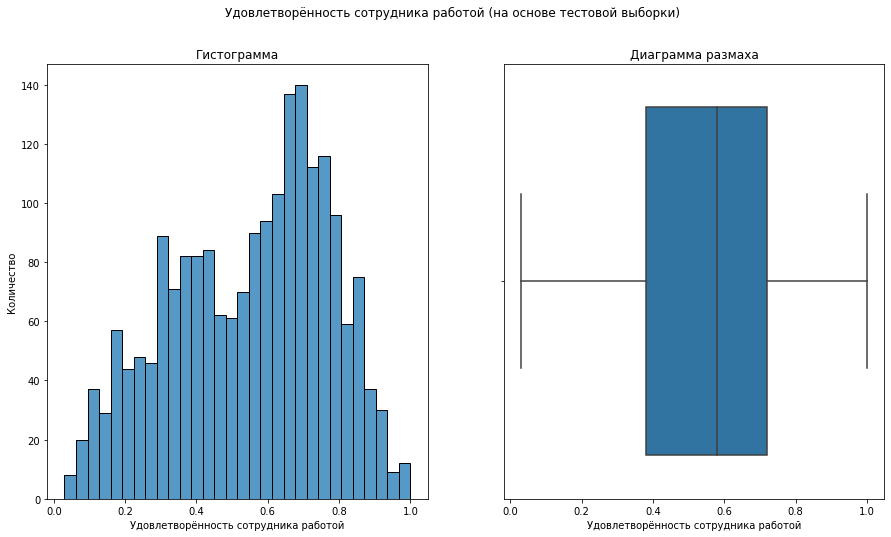

In [38]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (15,8))
sn.histplot(data = test_target,x = 'job_satisfaction_rate', ax=axs[0], bins = 30)
axs[0].set_xlabel('Удовлетворённость сотрудника работой')
axs[0].set_ylabel('Количество')
axs[0].set_title('Гистограмма')
sn.boxplot(data = test_target,x = 'job_satisfaction_rate', ax=axs[1])
axs[1].set_xlabel('Удовлетворённость сотрудника работой')
axs[1].set_title('Диаграмма размаха')
fig.suptitle('Удовлетворённость сотрудника работой (на основе тестовой выборки)')
plt.show()

Изучим распределение по признаку отдел (то есть в каком отделе работают сотрудники). Для наглядности построим круговую диаграмму и обозначим на ней процентное соотношение

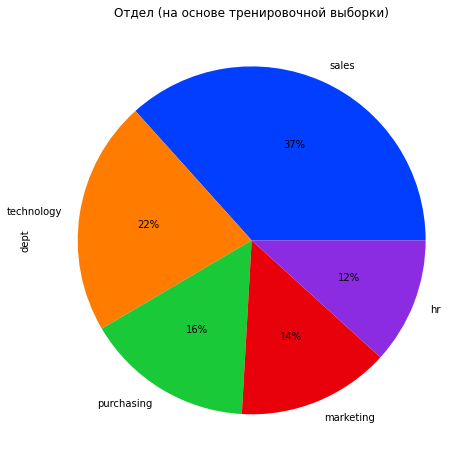

In [39]:
palette_color = sn.color_palette('bright') 
train_job['dept'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%',
                                      title = 'Отдел (на основе тренировочной выборки)',
                                      colors = palette_color, figsize = (15, 8))
plt.show()

Далее сделаем тоже самое на тестовой выборке

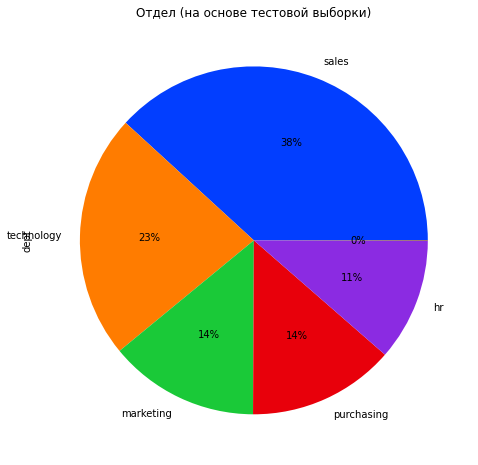

In [40]:
palette_color = sn.color_palette('bright') 
test_features['dept'].value_counts().plot(y = 'count', kind = 'pie',
                                          autopct='%1.0f%%', title = 'Отдел (на основе тестовой выборки)',
                                          colors = palette_color, figsize = (15, 8))
plt.show()

Далее поработаем с признаком уровень занимаемой должности, для начала на тренировочной выборке

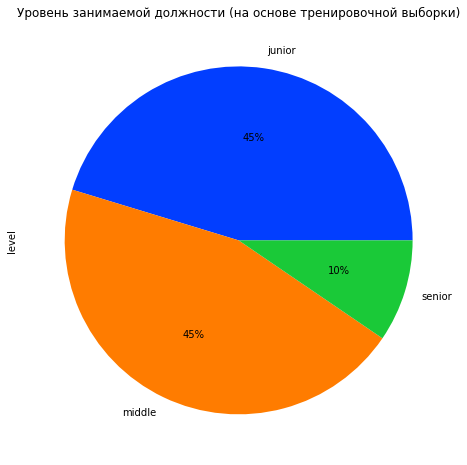

In [41]:
palette_color = sn.color_palette('bright') 
train_job['level'].value_counts().plot(y = 'count', kind = 'pie',
                                       autopct='%1.0f%%',
                                       title = 'Уровень занимаемой должности (на основе тренировочной выборки)',
                                       colors = palette_color, figsize = (15, 8))
plt.show()

Теперь сделаем тоже самое для тестовой выборки

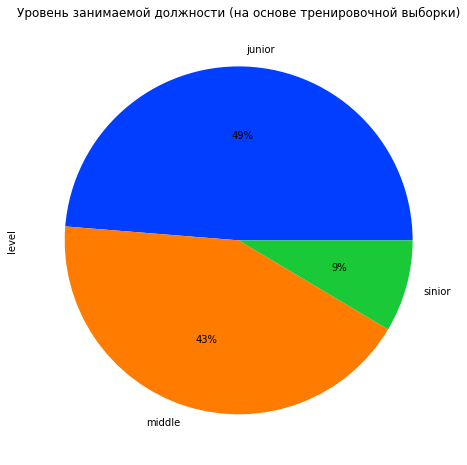

In [42]:
palette_color = sn.color_palette('bright') 
test_features['level'].value_counts().plot(y = 'count', kind = 'pie',
                                       autopct='%1.0f%%',
                                       title = 'Уровень занимаемой должности (на основе тренировочной выборки)',
                                       colors = palette_color, figsize = (15, 8))
plt.show()

Следующий шаг - анализ признака уровень загруженности сотрудника

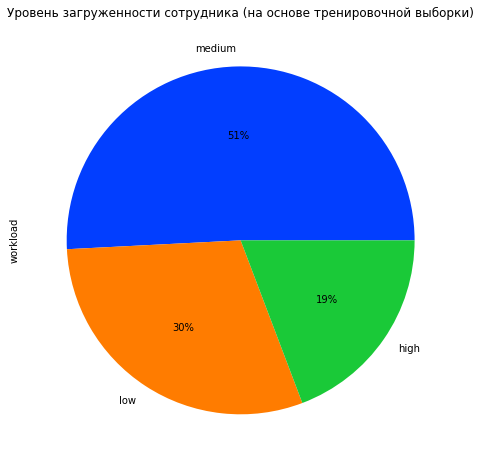

In [43]:
palette_color = sn.color_palette('bright') 
train_job['workload'].value_counts().plot(y = 'count',
                                          kind = 'pie',
                                          autopct='%1.0f%%',
                                          title = 'Уровень загруженности сотрудника (на основе тренировочной выборки)',
                                          colors = palette_color, figsize = (15, 8))
plt.show()

Теперь тоже самое для тестовой выборки

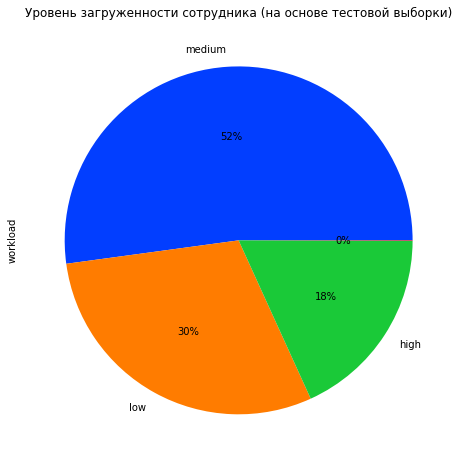

In [44]:
palette_color = sn.color_palette('bright') 
test_features['workload'].value_counts().plot(y = 'count',
                                          kind = 'pie',
                                          autopct='%1.0f%%',
                                          title = 'Уровень загруженности сотрудника (на основе тестовой выборки)',
                                          colors = palette_color, figsize = (15, 8))
plt.show()

Поработаем с признаком было или не было повышение 

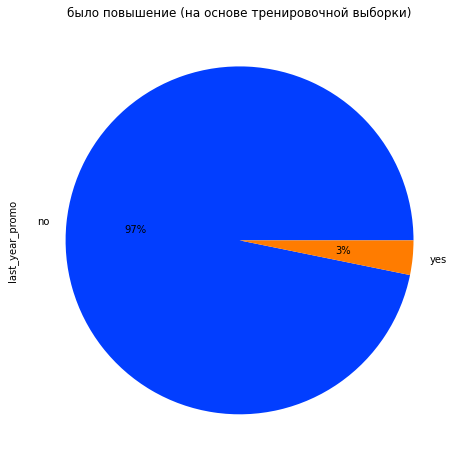

In [45]:
palette_color = sn.color_palette('bright') 
train_job['last_year_promo'].value_counts().plot(y = 'count',
                                                 kind = 'pie',
                                                 autopct='%1.0f%%',
                                                 title = 'было повышение (на основе тренировочной выборки)',
                                                 colors = palette_color, figsize = (15, 8))
plt.show()

Далее тоже самое для тестовой выборки

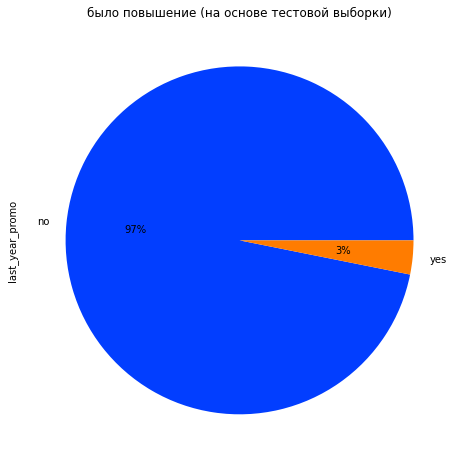

In [46]:
palette_color = sn.color_palette('bright') 
test_features['last_year_promo'].value_counts().plot(y = 'count',
                                                 kind = 'pie',
                                                 autopct='%1.0f%%',
                                                 title = 'было повышение (на основе тестовой выборки)',
                                                 colors = palette_color, figsize = (15, 8))
plt.show()

Далее анализируем были ли нарушения трудового договора за прошедший год, для начала на тренировочной выборке

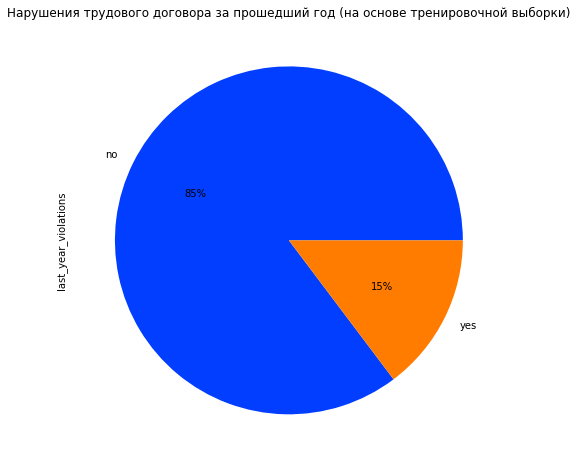

In [47]:
palette_color = sn.color_palette('bright') 
train_job['last_year_violations'].value_counts().plot(y = 'count',
                                                      kind = 'pie',
                                                      autopct='%1.0f%%',
                                                      title = 'Нарушения трудового договора за прошедший год (на основе тренировочной выборки)',
                                                      colors = palette_color, figsize = (15, 8))
plt.show()

Далее для тестовой выборки

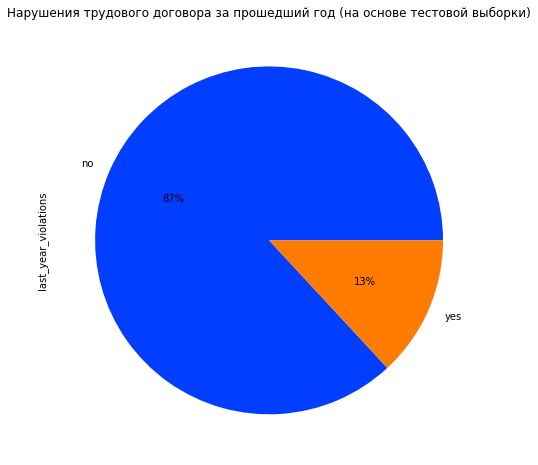

In [48]:
palette_color = sn.color_palette('bright') 
test_features['last_year_violations'].value_counts().plot(y = 'count',
                                                      kind = 'pie',
                                                      autopct='%1.0f%%',
                                                      title = 'Нарушения трудового договора за прошедший год (на основе тестовой выборки)',
                                                      colors = palette_color, figsize = (15, 8))
plt.show()

Далее поработаем с признаком оценка супервизора на основе тренировочной выборки

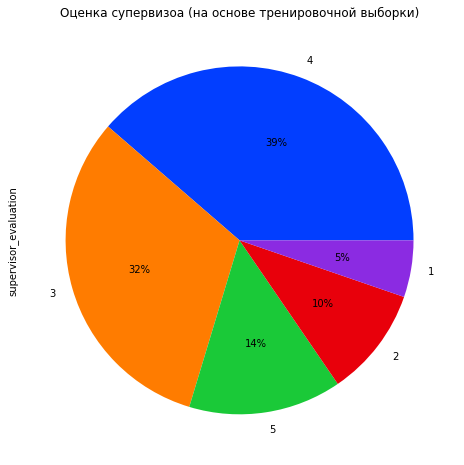

In [49]:
palette_color = sn.color_palette('bright') 
train_job['supervisor_evaluation'].value_counts().plot(y = 'count',
                                                       kind = 'pie',
                                                       autopct='%1.0f%%',
                                                       title = 'Оценка супервизоа (на основе тренировочной выборки)',
                                                       colors = palette_color, figsize = (15, 8))
plt.show()

Далее тоже самое на основе тестовой выборки

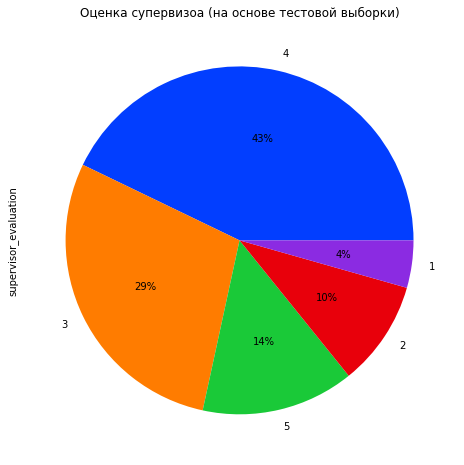

In [50]:
palette_color = sn.color_palette('bright') 
test_features['supervisor_evaluation'].value_counts().plot(y = 'count',
                                                       kind = 'pie',
                                                       autopct='%1.0f%%',
                                                       title = 'Оценка супервизоа (на основе тестовой выборки)',
                                                       colors = palette_color, figsize = (15, 8))
plt.show()

### Выводы
Большинство сотрудников работает в отделе продаж. Уровень должности в основном junior и middle. Большинство сотрудников работают от 1 до 2 лет. Средний уровень з/п сотрудников от 25 до 40к руб. Больше всего уровень загруженности у middle. Повышение было у 3% сотрудников. Самая популярная оценка супервизира - 4, самая редкая - 1. Сильных отличий тестовой и тренировочной выборок нет

Мне не очень нравятся графики распределения удовлетворенности сотрудника, хочу отдельно сделать распределения в зависимости от различных признаков, этим и займемся 

Построим графики распределения уровня удовлетворенности в зависимости от уровня сотрудника (level)

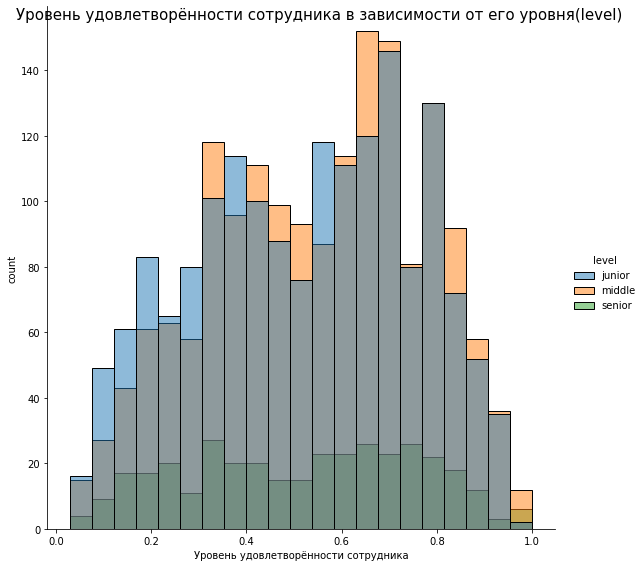

In [51]:
plot = sns.displot(data=train_job,x="job_satisfaction_rate",
                   hue="level",kind="hist",
                   height=8)
plot.set_axis_labels("Уровень удовлетворённости сотрудника", "count")
plot.fig.suptitle("Уровень удовлетворённости сотрудника в зависимости от его уровня(level)",
                  fontsize=15, fontdict={"weight": "bold"});

Далее построим графики распределения уровня удовлетворенности в зависимости от отдела, в котором работает сотрудник (dept)

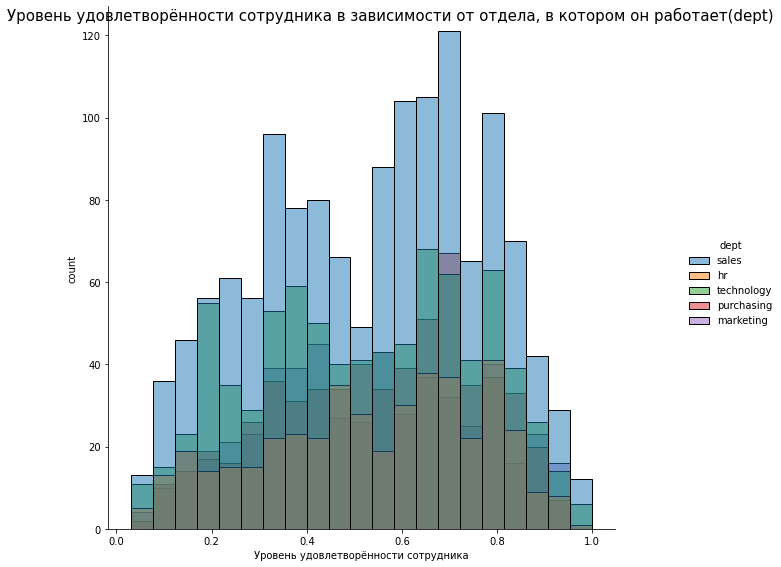

In [52]:
plot = sns.displot(data=train_job,x="job_satisfaction_rate",
                   hue="dept",kind="hist",
                   height=8)
plot.set_axis_labels("Уровень удовлетворённости сотрудника", "count")
plot.fig.suptitle("Уровень удовлетворённости сотрудника в зависимости от отдела, в котором он работает(dept)",
                  fontsize=15, fontdict={"weight": "bold"});

Далее построим график распределения уровня удовлетворенности в зависимости от уровня загруженности (workload)

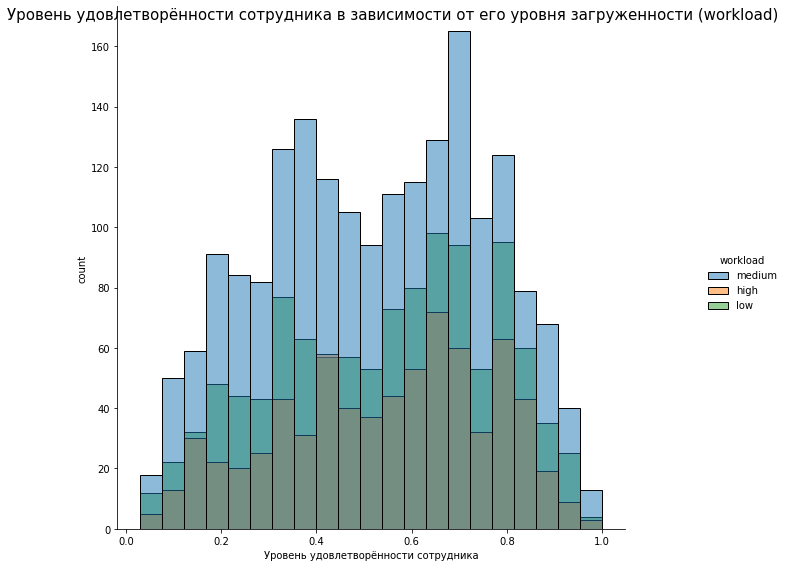

In [53]:
plot = sns.displot(data=train_job,x="job_satisfaction_rate",
                   hue="workload",kind="hist",
                   height=8)
plot.set_axis_labels("Уровень удовлетворённости сотрудника", "count")
plot.fig.suptitle("Уровень удовлетворённости сотрудника в зависимости от его уровня загруженности (workload)",
                  fontsize=15, fontdict={"weight": "bold"});

построим график распределения уровня удовлетворенности в зависимости от было ли повышение или нет last_year_promo

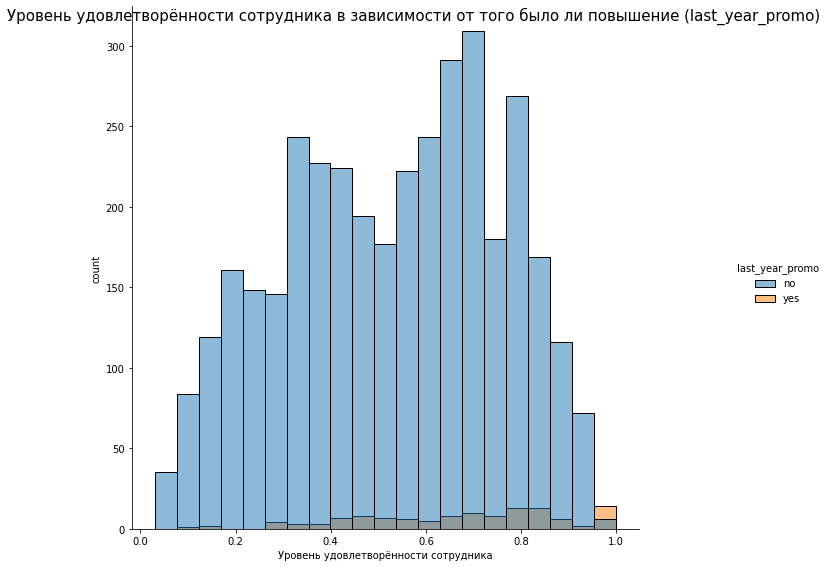

In [54]:
plot = sns.displot(data=train_job,x="job_satisfaction_rate",
                   hue="last_year_promo",kind="hist",
                   height=8)
plot.set_axis_labels("Уровень удовлетворённости сотрудника", "count")
plot.fig.suptitle("Уровень удовлетворённости сотрудника в зависимости от того было ли повышение (last_year_promo)",
                  fontsize=15, fontdict={"weight": "bold"});

построим графики распределения уровня удовлетворенности в зависимости от было ли нарушение или нет last_year_violations

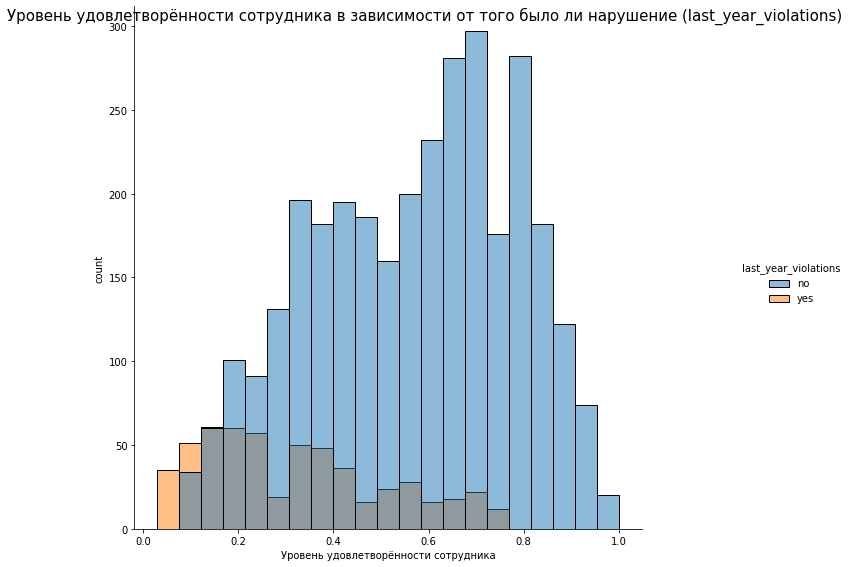

In [55]:
plot = sns.displot(data=train_job,x="job_satisfaction_rate",
                   hue="last_year_violations",kind="hist",
                   height=8)
plot.set_axis_labels("Уровень удовлетворённости сотрудника", "count")
plot.fig.suptitle("Уровень удовлетворённости сотрудника в зависимости от того было ли нарушение (last_year_violations)",
                  fontsize=15, fontdict={"weight": "bold"});

### Дополнительные выводы
Уровень удовлетворенности сотрудников выше всего у сотрудников в отделе закупок, хотя больше всего сотрудников работает в отделе продаж. Уровень должности в основном junior и middle,но удовлетворенны в основном в должности middle. В основном работки удовлетворены работой со средней и высокой загруженностью. Сотрудники, получившие повышения, удовлетворены, хоть их и было немного. Нарушений работы было мало, сотрудники у которых их нет имеют более высокий уровень удовлетворенности.

Создадим список категориальных признаков

In [56]:
cat_col = train_job[['dept','level','workload','last_year_promo','last_year_violations','job_satisfaction_rate']].copy()

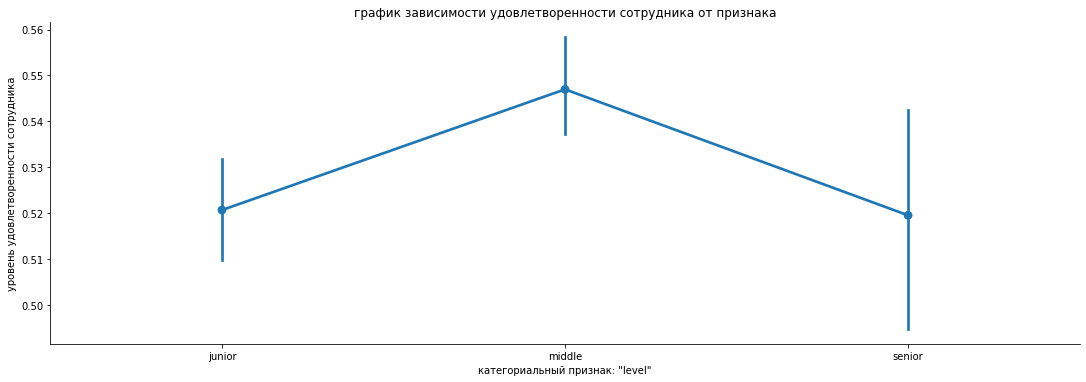

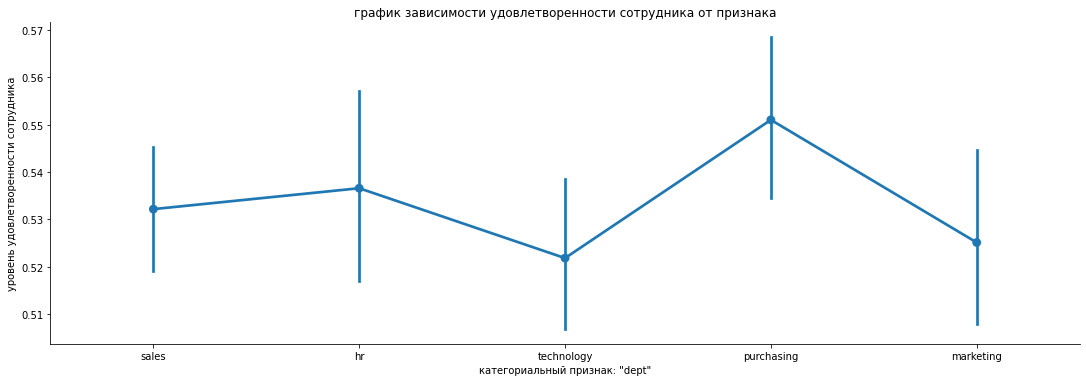

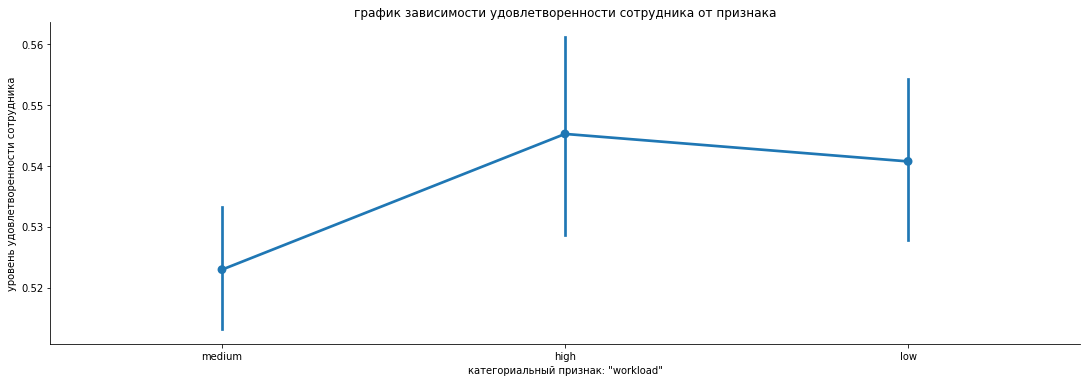

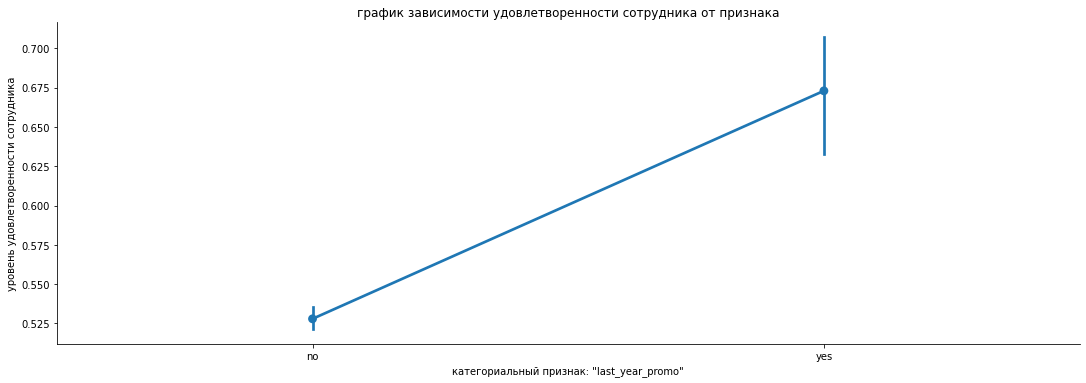

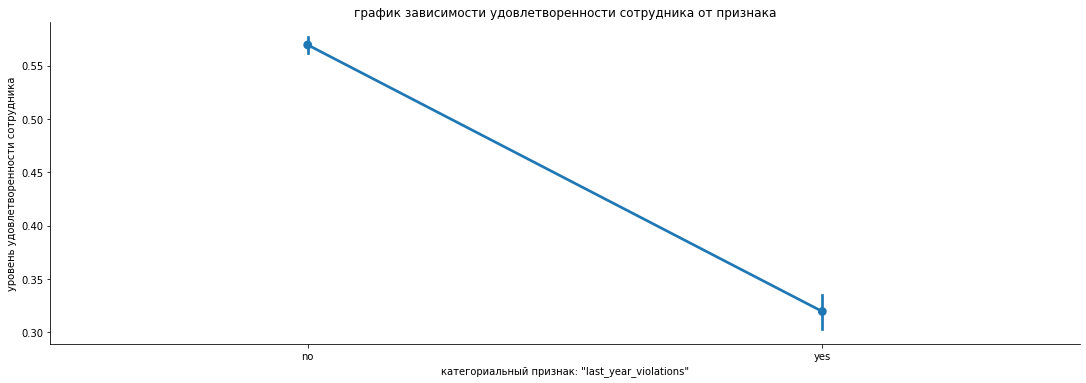

In [57]:
#Получаем графики по категориальным признакам
for i,col in enumerate(['level','dept','workload','last_year_promo','last_year_violations']):
    #plt.Figure(i)
    sns.catplot(y='job_satisfaction_rate', x=col, data=cat_col, kind='point', aspect=3);
    plt.title('график зависимости удовлетворенности сотрудника от признака');
    plt.xlabel(f'категориальный признак: "{col}"');
    plt.ylabel('уровень удовлетворенности сотрудника');

Построил графики уровня удовлетворенности сотрудников в зависимости от категориальных признаков. Выводы выше подтвердились. 

### Корреляционный анализ

Построим матрицу корреляции phik для тренирочной выборки train_job

In [58]:
train_job.phik_matrix(interval_cols = ['salary', 'job_satisfaction_rate']).style.background_gradient(cmap ='coolwarm')

Построим матрицу корреляции phik для тестовой выборки test_features

In [59]:
test_features.phik_matrix(interval_cols = ['salary'] ).style.background_gradient(cmap ='coolwarm')

### Выводы по корреляционному анализу
По тренивочоной выборке есть высокая зависимость между признаками ежемесячная зарплата у уровню занимаемой должности, зарплата и загруженность и между уровнем удовлетворенности и оценкой супервизора. Также наблюдаем прямую зависимость между признаками нарушения сотрудника и уровню удовлетворённости сотрудника.
По тестовой выборке наблюдаем заментную связь между уровнем и длительностью работы в компании и зарплаты сотрудника. 
Нигде связь не превышает 0.9, поэтому менять ничего не будем. Сильных отличий между выборками не наблюдается. 

## Шаг 4. Подготовка данных

In [60]:
#создадим новый датафрейм, объединив test_features и test_target по 'id'
feautures_all = test_features.join(test_target,on='id')

In [61]:
#создаём константы RANDOM_STATE и делим даные
RANDOM_STATE = 42
TEST_SIZE = 0.25
y = train_job['job_satisfaction_rate']
X = train_job.drop(['job_satisfaction_rate'], axis = 1)

In [62]:
#разобьем выборку
X_train =  train_job.drop(['job_satisfaction_rate'], axis=1)
X_test = feautures_all.drop(['job_satisfaction_rate'], axis=1)
y_train = train_job['job_satisfaction_rate']
y_test = feautures_all['job_satisfaction_rate']

In [63]:
#создадим списки с названиями признаков
ohe_columns = ['last_year_promo','last_year_violations','dept']
ord_columns = ['level','workload']
num_columns = ['supervisor_evaluation', 'employment_years', 'salary']

In [64]:
ohe_pipe = Pipeline([
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output =False))]) 

In [65]:
ord_pipe = Pipeline([(
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',  
            OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'senior'],
                    ['low', 'medium', 'high']
                ], 
                handle_unknown='error')),(
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent'))]) 

In [66]:
# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe,ord_columns),
     ('num', MinMaxScaler(), num_columns)],
    remainder='passthrough')

## Шаг 5. Обучение моделей

In [67]:
# создаём итоговый пайплайн
pipe_final = Pipeline([('preprocessor', data_preprocessor)
                       ,('models',RandomForestRegressor(random_state=RANDOM_STATE))])

In [68]:
# словарь для моделей
param_distributions = [
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': [None] + [i for i in range(2, 7)],
        'models__min_samples_split': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    },
    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    },
    {
        'models': [Ridge(random_state = RANDOM_STATE)],
        'models__solver': ['saga', 'auto'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    }
] 

In [69]:
#Создаём функцию для определения метрики sMAPE
def smape_score(y_true, y_pred):
    return 100/len(y_true) * np.sum(np.abs(y_true-y_pred)/(np.abs(y_true) + np.abs(y_pred))/2)
#Используем make scorer для метрики smape
smape_scorer = make_scorer(smape_score, greater_is_better = False)

In [70]:
def smape_unweighted(y_true, y_pred):
    error = abs(y_true - y_pred)
    scale = (abs(y_true) + abs(y_pred)) / 2 + 0.000000001
    result = ((error / scale).mean())*100
    return result
#Используем make scorer для метрики smape
smape_scorer = make_scorer(smape_unweighted, greater_is_better = False)

In [71]:
grid_search = GridSearchCV(
    pipe_final, 
    param_distributions, 
    cv = 5,
    scoring=smape_scorer, 
    n_jobs=-1
)
grid_search.fit(X, y)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('simpleImputer_ohe',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['last_year_promo',
                                                                          'last_year_violations',
                                                                          'dept']),
                                                                        ('ord',
                                                                         Pipeline(...
                         {'models': [LinearRegression()],
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(), RobustScaler(),
                                                'passthrough']},
                         {'models': [Ridge(random_state=42)],
                          'models__solver': ['saga', 'auto'],
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(), RobustScaler(),
                                                'passthrough']}],
             scoring=make_scorer(smape_unweighted, greater_is_better=False, response_method='predict'))

In [72]:
best_model = grid_search.best_estimator_
dt_model = best_model.named_steps['models']
dt_model

DecisionTreeRegressor(min_samples_split=8, random_state=42)

In [73]:
print(f'Метрика лучшей модели на кросс-валидации: {-grid_search.best_score_}')

Метрика лучшей модели на кросс-валидации: 15.058822361167795


Лучшей моделью является DecisionTreeRegressor(min_samples_split=8, random_state=42). Далее проверим её качество на тестовой выборке

In [74]:
y_test = y_test.sort_index()
train_job = train_job.sort_index()

In [75]:
y_predict = grid_search.predict(train_job)

In [76]:
smape_score(np.array(train_job['job_satisfaction_rate']), y_predict)

2.255475529350566

Значени метрики меньше 15, значит модель работает успешно. 

## Шаг 6. Промежуточные выводы 
Симметричная средняя абсолютная процентная ошибка (SMAPE) 15%. На данном шаге была найдена и обучена лучшая модель по предсказанию уровня удовлетворённости сотрудника работой. Значение метрики на тестовой выборке состалвяет 9, что нас устраивает, ведь для неё необходимо значение меньше 15. Лучше моделью стала DecisionTreeRegressor(min_samples_split=8, random_state=42). Данная модель справилась даже лучше линейной регрессии, так как лучше справляется при нелинейной зависимости признаков, а учитывая матрицу корреляции, таких признаков много.

# Задача 2 предсказание увольнения сотрудника из компании

## Шаг 1. Загрузка данных

In [77]:
train_quit = pd.read_csv('/datasets/train_quit.csv')
test_features = pd.read_csv('/datasets/test_features.csv')
test_target_quit = pd.read_csv('/datasets/test_target_quit.csv')

In [78]:
#прочитаем по очереди все датафреймы
train_quit.head()

id        dept   level workload  employment_years last_year_promo  \
0  723290       sales  middle     high                 2              no   
1  814010       sales  junior   medium                 2              no   
2  155091  purchasing  middle   medium                 5              no   
3  257132       sales  junior   medium                 2              no   
4  910140   marketing  junior   medium                 2              no   

  last_year_violations  supervisor_evaluation  salary quit  
0                   no                      4   54000   no  
1                   no                      4   27600   no  
2                   no                      1   37200   no  
3                  yes                      3   24000  yes  
4                   no                      5   25200   no

In [79]:
test_features.head()

id       dept   level workload  employment_years last_year_promo  \
0  485046  marketing  junior   medium                 2              no   
1  686555         hr  junior   medium                 1              no   
2  467458      sales  middle      low                 5              no   
3  418655      sales  middle      low                 6              no   
4  789145         hr  middle   medium                 5              no   

  last_year_violations  supervisor_evaluation  salary  
0                   no                      5   28800  
1                   no                      4   30000  
2                   no                      4   19200  
3                   no                      4   19200  
4                   no                      5   40800

In [80]:
test_target_quit.head()

id quit
0  999029  yes
1  372846   no
2  726767   no
3  490105   no
4  416898  yes

## Шаг 2. Предобработка данных

In [81]:
#избавимся от 'id'
train_quit.set_index('id', inplace=True)
test_features.set_index('id', inplace=True)
test_target_quit.set_index('id', inplace=True)

In [82]:
#изучим общую информацию о всех датафреймах

In [83]:
train_quit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 723290 to 853842
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   4000 non-null   object
 1   level                  4000 non-null   object
 2   workload               4000 non-null   object
 3   employment_years       4000 non-null   int64 
 4   last_year_promo        4000 non-null   object
 5   last_year_violations   4000 non-null   object
 6   supervisor_evaluation  4000 non-null   int64 
 7   salary                 4000 non-null   int64 
 8   quit                   4000 non-null   object
dtypes: int64(3), object(6)
memory usage: 312.5+ KB


In [84]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 485046 to 771859
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   1998 non-null   object
 1   level                  1999 non-null   object
 2   workload               2000 non-null   object
 3   employment_years       2000 non-null   int64 
 4   last_year_promo        2000 non-null   object
 5   last_year_violations   2000 non-null   object
 6   supervisor_evaluation  2000 non-null   int64 
 7   salary                 2000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 140.6+ KB


In [85]:
test_target_quit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 999029 to 460332
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   quit    2000 non-null   object
dtypes: object(1)
memory usage: 31.2+ KB


In [86]:
#Проверяем пропуски train_quit
train_quit.isna().sum()

dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
quit                     0
dtype: int64

In [87]:
#Проверяем пропуски test_target_quit
test_target_quit.isna().sum()

quit    0
dtype: int64

In [88]:
#Выводим дубликаты в датафрейме train_quit
train_quit.duplicated().sum()

1413

In [89]:
#удаляем дубликаты
train_quit = train_quit.drop_duplicates()
train_quit = train_quit.reset_index(drop=True)

In [90]:
#Выводим дубликаты в датафрейме test_target_quit
test_target_quit.duplicated().sum()

1998

In [91]:
#Выводим на экран все уникальные значения level датафрейма train_quit
train_quit['level'].unique()

array(['middle', 'junior', 'sinior'], dtype=object)

In [92]:
#Поменяем название в столбце level
train_quit['level'] = train_quit['level'].str.replace('sinior','senior',  regex=True)

In [93]:
#Выводим на экран уникальные значения dept
train_quit['dept'].unique()

array(['sales', 'purchasing', 'marketing', 'technology', 'hr'],
      dtype=object)

In [94]:
#Заменим пропуски в столбце dept
train_job.loc[train_job['dept'] == ' ','dept'] = np.nan

In [95]:
#Выводим на экран все уникальные значения workload
train_quit['workload'].unique()

array(['high', 'medium', 'low'], dtype=object)

In [96]:
#Выводим на экран все уникальные значения last_year_promo
train_quit['last_year_promo'].unique()

array(['no', 'yes'], dtype=object)

In [97]:
#Выводим на экран все уникальные значения last_year_violations
train_quit['last_year_violations'].unique()

array(['no', 'yes'], dtype=object)

Пропусков нет. Дубликаты присутствуют, из тренировочной выборки они были удалены

## Шаг 3. Исследовательский анализ данных

In [98]:
#изучим статистические данные train_quit
train_quit.describe()

employment_years  supervisor_evaluation        salary
count       2587.000000            2587.000000   2587.000000
mean           4.213375               3.367994  37107.692308
std            2.601105               1.080243  16267.354906
min            1.000000               1.000000  12000.000000
25%            2.000000               3.000000  24000.000000
50%            4.000000               3.000000  33600.000000
75%            6.000000               4.000000  46800.000000
max           10.000000               5.000000  96000.000000

In [99]:
test_features.describe()

employment_years  supervisor_evaluation        salary
count       2000.000000            2000.000000   2000.000000
mean           3.666500               3.526500  34066.800000
std            2.537222               0.996892  15398.436729
min            1.000000               1.000000  12000.000000
25%            1.000000               3.000000  22800.000000
50%            3.000000               4.000000  30000.000000
75%            6.000000               4.000000  43200.000000
max           10.000000               5.000000  96000.000000

In [100]:
test_target_quit.describe()

quit
count   2000
unique     2
top       no
freq    1436

Построим круговые диаграммы длительности работы сотрудника в компании для тестовой и тренировочной выборок

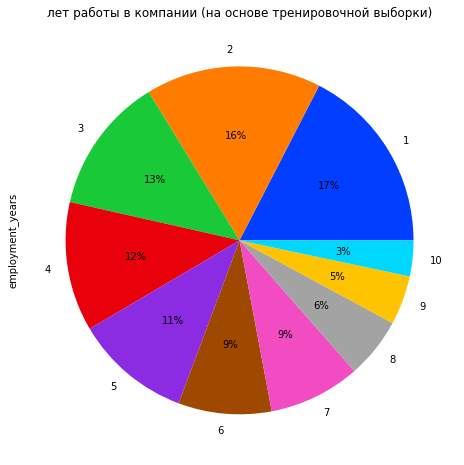

In [101]:
palette_color = sn.color_palette('bright') 
train_quit['employment_years'].value_counts().plot(y = 'count',
                                                   kind = 'pie',
                                                   autopct='%1.0f%%',
                                                   title = 'лет работы в компании (на основе тренировочной выборки)',
                                                   colors = palette_color,
                                                   figsize = (15, 8))
plt.show()

Теперь тоже самое, но для тестовой выборки

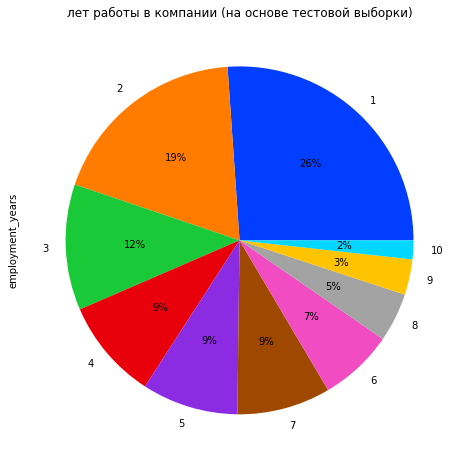

In [102]:
palette_color = sn.color_palette('bright') 
test_features['employment_years'].value_counts().plot(y = 'count',
                                                   kind = 'pie',
                                                   autopct='%1.0f%%',
                                                   title = 'лет работы в компании (на основе тестовой выборки)',
                                                   colors = palette_color,
                                                   figsize = (15, 8))
plt.show()

Далее построим гистограмму распределения и диаграмму размаха ежемесячной зарплаты для двух выборок

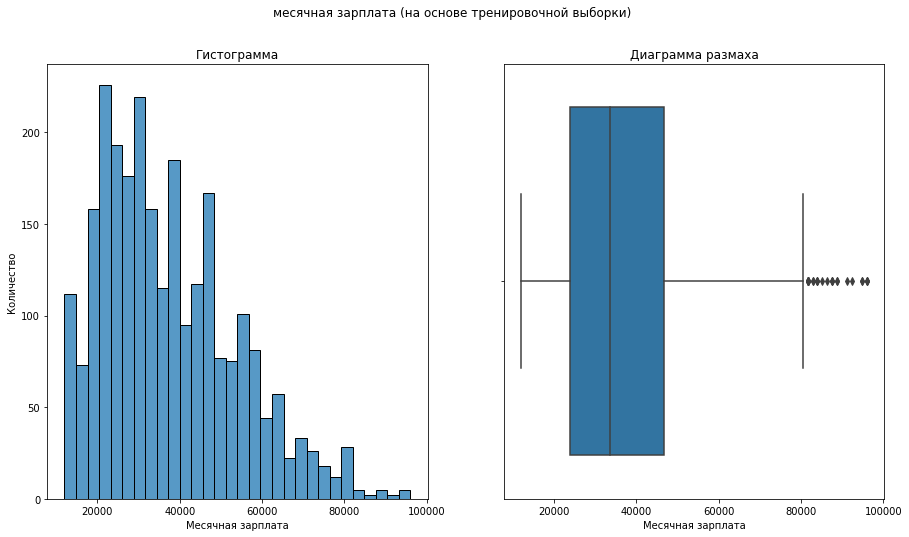

In [103]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (15,8))
sn.histplot(data = train_quit,x = 'salary', ax=axs[0], bins = 30)
axs[0].set_xlabel('Месячная зарплата')
axs[0].set_ylabel('Количество')
axs[0].set_title('Гистограмма')
sn.boxplot(data = train_quit,x = 'salary', ax=axs[1])
axs[1].set_xlabel('Месячная зарплата')
axs[1].set_title('Диаграмма размаха')
fig.suptitle('месячная зарплата (на основе тренировочной выборки)')
plt.show()

Теперь тоже самое, но для тестовой выборки

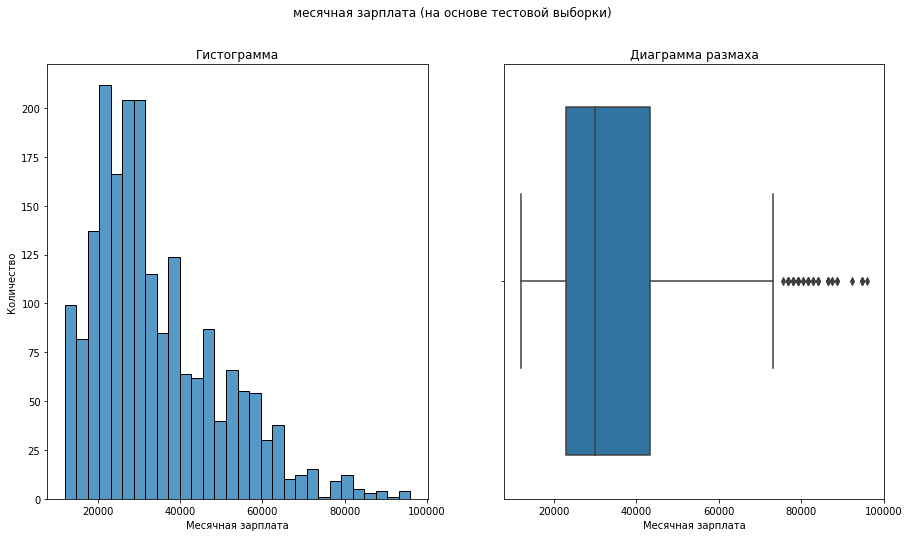

In [104]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (15,8))
sn.histplot(data = test_features,x = 'salary', ax=axs[0], bins = 30)
axs[0].set_xlabel('Месячная зарплата')
axs[0].set_ylabel('Количество')
axs[0].set_title('Гистограмма')
sn.boxplot(data = test_features,x = 'salary', ax=axs[1])
axs[1].set_xlabel('Месячная зарплата')
axs[1].set_title('Диаграмма размаха')
fig.suptitle('месячная зарплата (на основе тестовой выборки)')
plt.show()

Посмотрим в каком отделе работают сотрудники с процентным соотношением на основе двух выборок

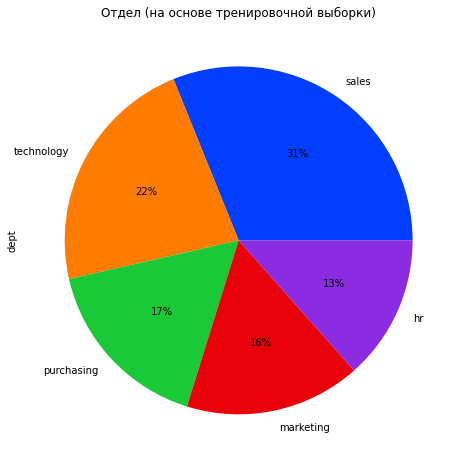

In [105]:
palette_color = sn.color_palette('bright') 
train_quit['dept'].value_counts().plot(y = 'count',
                                    kind = 'pie',
                                    autopct='%1.0f%%',
                                    title = 'Отдел (на основе тренировочной выборки)',
                                    colors = palette_color, figsize = (15, 8))
plt.show()

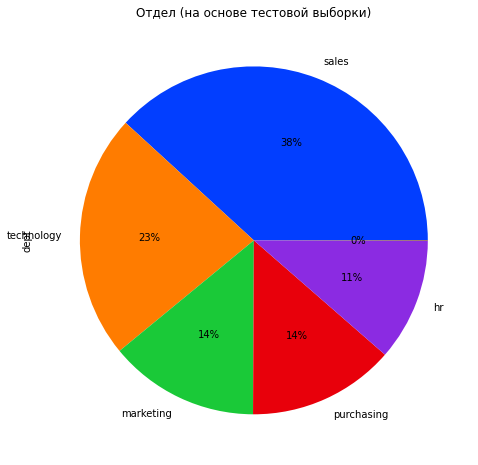

In [106]:
palette_color = sn.color_palette('bright') 
test_features['dept'].value_counts().plot(y = 'count',
                                    kind = 'pie',
                                    autopct='%1.0f%%',
                                    title = 'Отдел (на основе тестовой выборки)',
                                    colors = palette_color, figsize = (15, 8))
plt.show()

Далее поработаем с признаком level 

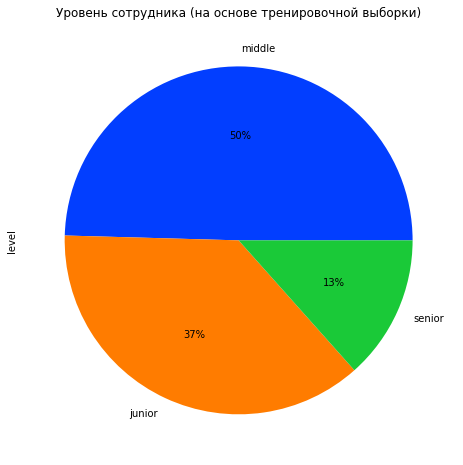

In [107]:
palette_color = sn.color_palette('bright') 
train_quit['level'].value_counts().plot(y = 'count',
                                        kind = 'pie',
                                        autopct='%1.0f%%',
                                        title = 'Уровень сотрудника (на основе тренировочной выборки)',
                                        colors = palette_color,
                                        figsize = (15, 8))
plt.show()

Тоже самое сделаем для тестовой выборки

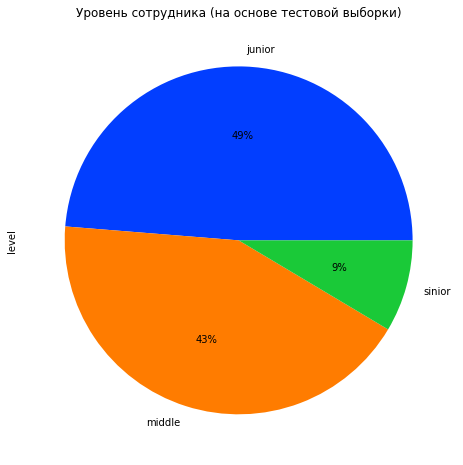

In [108]:
palette_color = sn.color_palette('bright') 
test_features['level'].value_counts().plot(y = 'count',
                                        kind = 'pie',
                                        autopct='%1.0f%%',
                                        title = 'Уровень сотрудника (на основе тестовой выборки)',
                                        colors = palette_color,
                                        figsize = (15, 8))
plt.show()

Далее работаем с признаком уровень загруженности

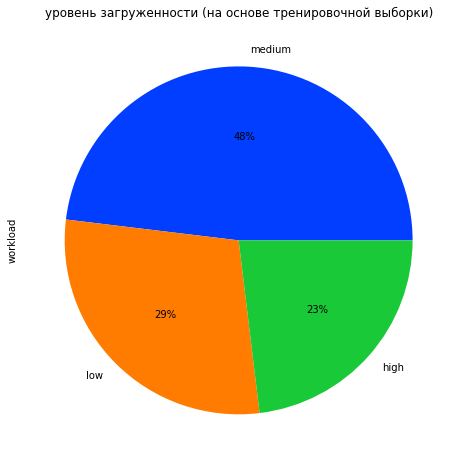

In [109]:
palette_color = sn.color_palette('bright') 
train_quit['workload'].value_counts().plot(y = 'count',
                                           kind = 'pie',
                                           autopct='%1.0f%%',
                                           title = 'уровень загруженности (на основе тренировочной выборки)',
                                           colors = palette_color,
                                           figsize = (15, 8))
plt.show()

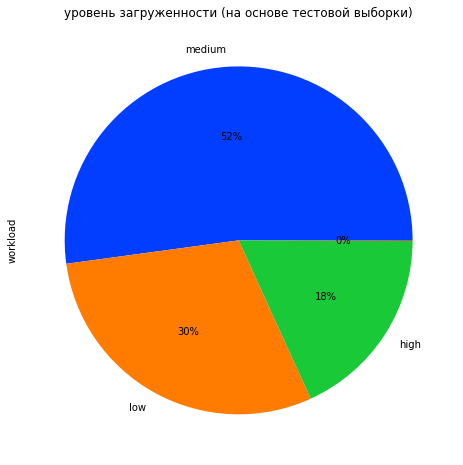

In [110]:
palette_color = sn.color_palette('bright') 
test_features['workload'].value_counts().plot(y = 'count',
                                           kind = 'pie',
                                           autopct='%1.0f%%',
                                           title = 'уровень загруженности (на основе тестовой выборки)',
                                           colors = palette_color,
                                           figsize = (15, 8))
plt.show()

Теперь поработаем с признаком было ли повышение или нет

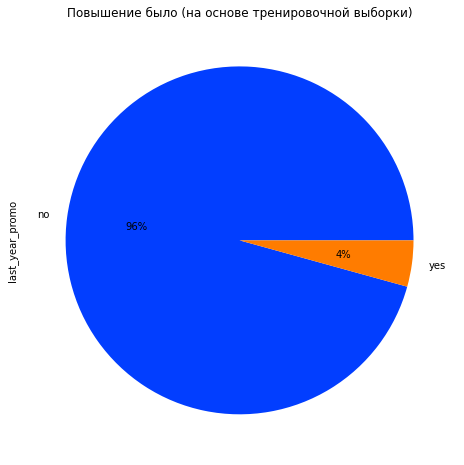

In [111]:
palette_color = sn.color_palette('bright') 
train_quit['last_year_promo'].value_counts().plot(y = 'count',
                                                  kind = 'pie',
                                                  autopct='%1.0f%%',
                                                  title = 'Повышение было (на основе тренировочной выборки)',
                                                  colors = palette_color,
                                                  figsize = (15, 8))
plt.show()

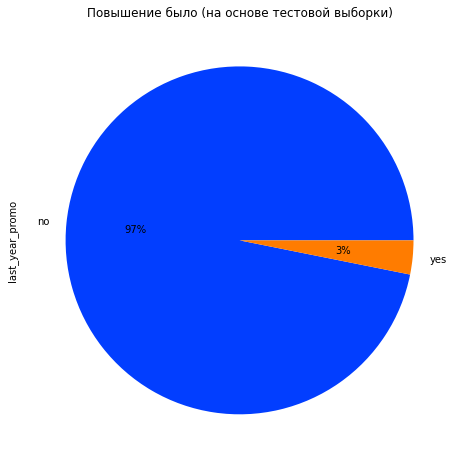

In [112]:
palette_color = sn.color_palette('bright') 
test_features['last_year_promo'].value_counts().plot(y = 'count',
                                                  kind = 'pie',
                                                  autopct='%1.0f%%',
                                                  title = 'Повышение было (на основе тестовой выборки)',
                                                  colors = palette_color,
                                                  figsize = (15, 8))
plt.show()

Далее работаем с признаком было нарушений договора

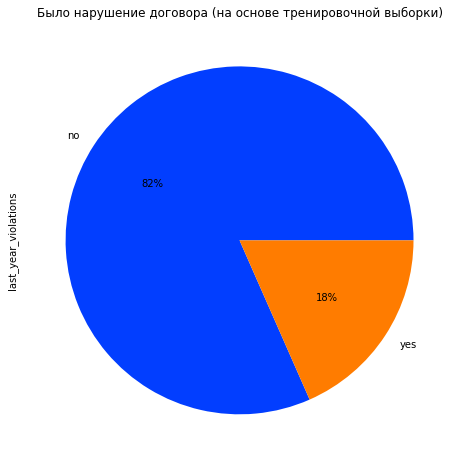

In [113]:
palette_color = sn.color_palette('bright') 
train_quit['last_year_violations'].value_counts().plot(y = 'count',
                                                       kind = 'pie',
                                                       autopct='%1.0f%%',
                                                       title = 'Было нарушение договора (на основе тренировочной выборки)',
                                                       colors = palette_color,
                                                       figsize = (15, 8))
plt.show()

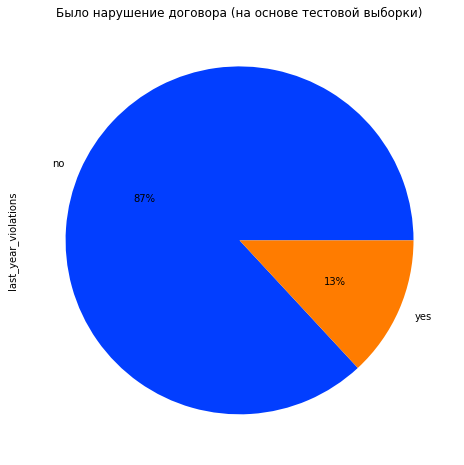

In [114]:
palette_color = sn.color_palette('bright') 
test_features['last_year_violations'].value_counts().plot(y = 'count',
                                                       kind = 'pie',
                                                       autopct='%1.0f%%',
                                                       title = 'Было нарушение договора (на основе тестовой выборки)',
                                                       colors = palette_color,
                                                       figsize = (15, 8))
plt.show()

Далее работаем с признаком оценка супервайзера

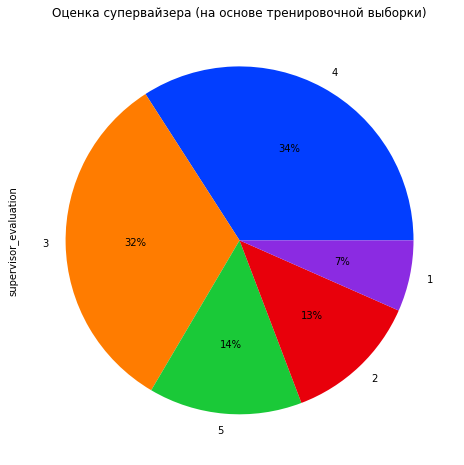

In [115]:
palette_color = sn.color_palette('bright') 
train_quit['supervisor_evaluation'].value_counts().plot(y = 'count',
                                                        kind = 'pie',
                                                        autopct='%1.0f%%',
                                                        title = 'Оценка супервайзера (на основе тренировочной выборки)',
                                                        colors = palette_color,
                                                        figsize = (15, 8))
plt.show()

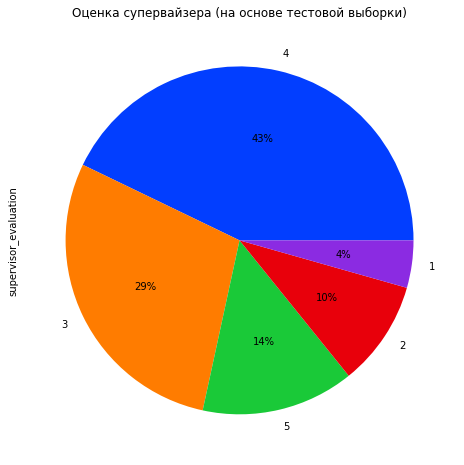

In [116]:
palette_color = sn.color_palette('bright') 
test_features['supervisor_evaluation'].value_counts().plot(y = 'count',
                                                        kind = 'pie',
                                                        autopct='%1.0f%%',
                                                        title = 'Оценка супервайзера (на основе тестовой выборки)',
                                                        colors = palette_color,
                                                        figsize = (15, 8))
plt.show()

### Корреляционный анализ

In [117]:
train_quit.phik_matrix(interval_cols = ['salary']).style.background_gradient(cmap ='coolwarm')

In [118]:
test_features.phik_matrix(interval_cols = ['salary']).style.background_gradient(cmap ='coolwarm')

### Выводы
между некоторыми признаками присутствует сильная и умеренная связь. Нигде коэффициент не превышает 0.9, поэтому изменять ничего не будем. Сильных отличий между тестовой и тренировочной выборок не выявлено.

## портрет «уволившегося сотрудника»

In [119]:
#Групируем по целевому признаку и по среднему всех признаков
train_quit.groupby('quit').mean()

employment_years  supervisor_evaluation        salary
quit                                                       
no            4.908903               3.506729  40952.173913
yes           2.161832               2.958779  25767.938931

В среднем сотрудники, которые уволняются зарабатывают 25,7 тыс. руб., со средней оценкой 2,9 и стажем работы чуть более 2 лет

Определим, из какого отдела больше всего увольняются сотрудники

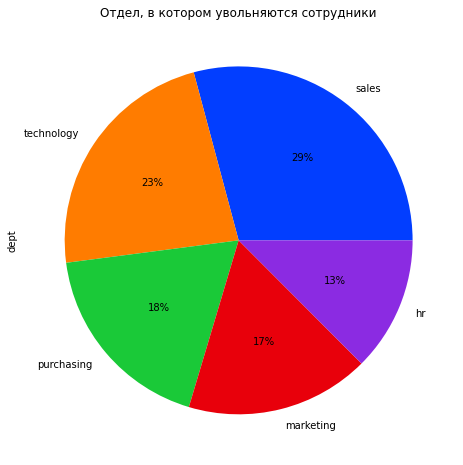

In [120]:
palette_color = sn.color_palette('bright') 
train_quit.loc[train_quit['quit'] == 'yes', 'dept'].value_counts().plot(y = 'count',
                                                                        kind = 'pie',
                                                                        autopct='%1.0f%%',
                                                                        title = 'Отдел, в котором увольняются сотрудники',
                                                                        colors = palette_color,
                                                                        figsize = (15, 8))
plt.show()

Чаще всего сотрудники увольняются из отдела продаж

Далее определим уровень уволившихся сотрудников

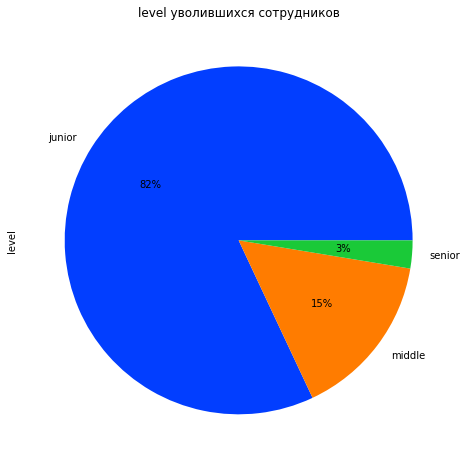

In [121]:
palette_color = sn.color_palette('bright') 
train_quit.loc[train_quit['quit'] == 'yes', 'level'].value_counts().plot(y = 'count',
                                                                         kind = 'pie',
                                                                         autopct='%1.0f%%',
                                                                         title = 'level уволившихся сотрудников',
                                                                         colors = palette_color,
                                                                         figsize = (15, 8))
plt.show()

В основном увольняются джуны

Далее оценим степень загруженности уволившихся сотрудников

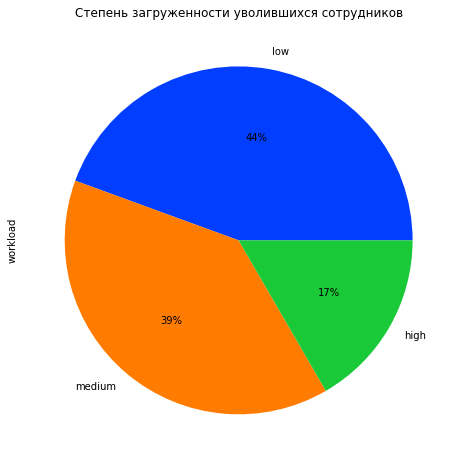

In [122]:
palette_color = sn.color_palette('bright') 
train_quit.loc[train_quit['quit'] == 'yes', 'workload'].value_counts().plot(y = 'count',
                                                                      kind = 'pie',
                                                                      autopct='%1.0f%%',
                                                                      title = 'Степень загруженности уволившихся сотрудников',
                                                                      colors = palette_color,
                                                                      figsize = (15, 8))
plt.show()

Интересная картина, 44% сотрудников, которые увольняются, имеют низкую степень загруженности, удивлен. 

Оценим длительность работы в компании

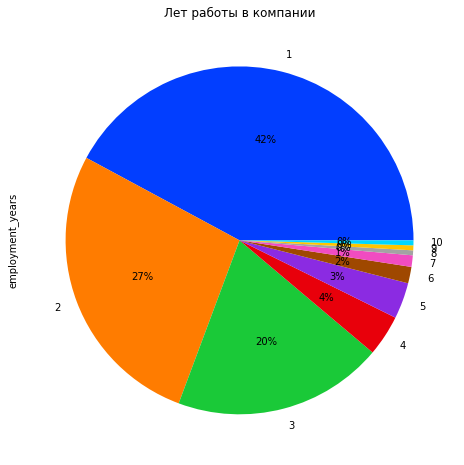

In [123]:
palette_color = sn.color_palette('bright') 
train_quit.loc[train_quit['quit'] == 'yes', 'employment_years'].value_counts().plot(y = 'count',
                                                                                  kind = 'pie',
                                                                                  autopct='%1.0f%%',
                                                                                  title = 'Лет работы в компании',
                                                                                  colors = palette_color,
                                                                                  figsize = (15, 8))
plt.show()

42% сотрудников, которые уволились, проработали всего год

Далее поработаем с признаком повышение

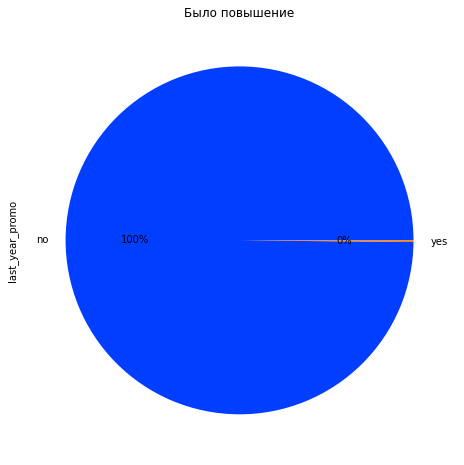

In [124]:
palette_color = sn.color_palette('bright') 
train_quit.loc[train_quit['quit'] == 'yes', 'last_year_promo'].value_counts().plot(y = 'count',
                                                                                   kind = 'pie',
                                                                                   autopct='%1.0f%%',
                                                                                   title = 'Было повышение',
                                                                                   colors = palette_color,
                                                                                   figsize = (15, 8))
plt.show()

Сотрудников, которые уволились, не повышали

Оценим признак нарушение трудового договора

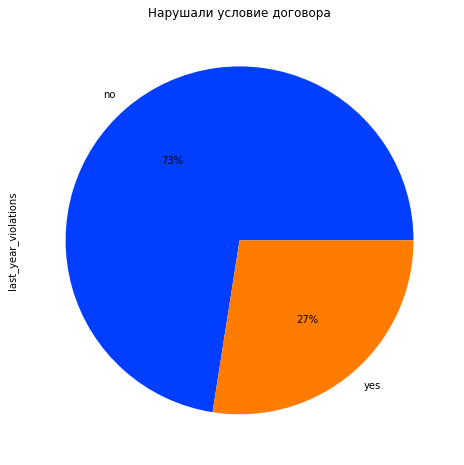

In [125]:
palette_color = sn.color_palette('bright') 
train_quit.loc[train_quit['quit'] == 'yes', 'last_year_violations'].value_counts().plot(y = 'count',
                                                                                        kind = 'pie',
                                                                                        autopct='%1.0f%%',
                                                                                        title = 'Нарушали условие договора',
                                                                                        colors = palette_color,
                                                                                        figsize = (15, 8))
plt.show()

Целых 27% уволившихся сотрудников нарушали условия трудового договора

Далее узнаем оценки супервайзера у уволившихся сотрудников

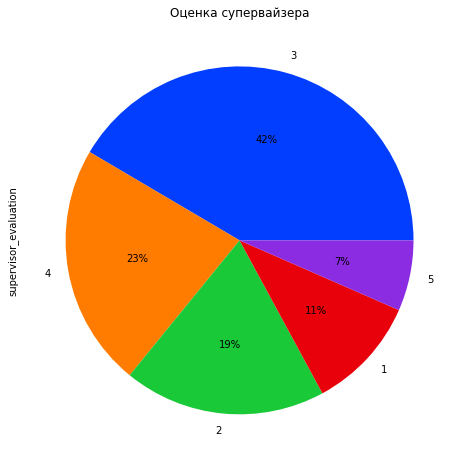

In [126]:
palette_color = sn.color_palette('bright') 
train_quit.loc[train_quit['quit'] == 'yes', 'supervisor_evaluation'].value_counts().plot(y = 'count',
                                                                                         kind = 'pie',
                                                                                         autopct='%1.0f%%',
                                                                                         title = 'Оценка супервайзера',
                                                                                         colors = palette_color,
                                                                                         figsize = (15, 8))
plt.show()

Чаще всего сотрудники, которые уволились, получали оценку супервайзера - 3

Для наглядности, посчитаем среднюю зарплату сотрудника, который уволился и, который остался в штате

In [127]:
no = train_quit.loc[train_quit['quit'] == 'no', 'salary'].mean()
yes = train_quit.loc[train_quit['quit'] == 'yes', 'salary'].mean()

In [128]:
print(f'Средняя зарплата сотрудника, который остался в компании: {no}')
print(f'Средняя зарплата уволившегося сотрудника: {yes}')

Средняя зарплата сотрудника, который остался в компании: 40952.17391304348
Средняя зарплата уволившегося сотрудника: 25767.93893129771


### Опишем портрет уволившегося сотрудника
1. В среднем сотрудники, которые уволняются зарабатывают 25,7 тыс. руб., со средней оценкой 2,9 и стажем работы чуть более 2 лет
2. Чаще всего сотрудники увольняются из отдела продаж (27%)
3. В основном увольняются джуны
4. 44% сотрудников, которые увольняются, имеют низкую степень загруженности, удивлен.
5. Сотрудников, которые уволились, не повышали
6. Целых 27% уволившихся сотрудников нарушали условия трудового договора

## визуализируйте и сравните распределения признака job_satisfaction_rate для ушедших и оставшихся сотрудников. Используйте данные с обоими целевыми признаками тестовой выборки.

In [129]:
#Соединяем целевые признаки в одну колонку
all_test_target = test_target.join(test_target_quit,on='id')

In [130]:
all_test_target.head()

job_satisfaction_rate quit
id                                
130604                   0.74   no
825977                   0.75   no
418490                   0.60  yes
555320                   0.72   no
826430                   0.08  yes

In [131]:
#построим графики по данным для сравнения целевых признаков
fig = px.histogram(all_test_target, x="job_satisfaction_rate",
                   title='Сравнительный график',
                   nbins=20)
fig.show(size=30)

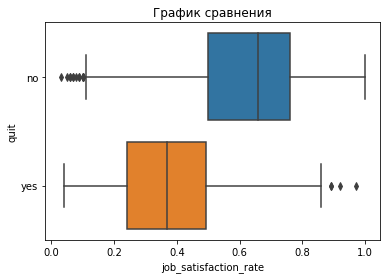

In [132]:
sns.boxplot(data=all_test_target, x='job_satisfaction_rate', y='quit');
plt.title("График сравнения");

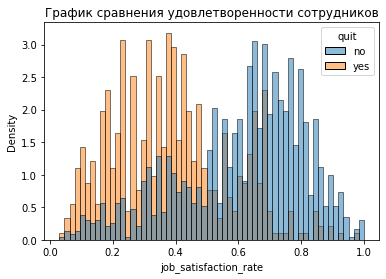

In [133]:
sns.histplot(data=all_test_target, x='job_satisfaction_rate',
             hue='quit',
             bins=60, stat='density',
             common_norm=False);
plt.title('График сравнения удовлетворенности сотрудников');

### Вывод
Из графиков видно, что уровень удовлетворенности сотрудников напрямую зависит от того, уволится он или нет. У большинства уволившихся сотрудников уровень удовл меньше 0.5, у оставшихся больше 0.6

## Шаг 4. Добавление нового входного признака

In [134]:
test_quit = test_features.merge(test_target_quit, on='id')

In [135]:
test_features.head()

dept   level workload  employment_years last_year_promo  \
id                                                                     
485046  marketing  junior   medium                 2              no   
686555         hr  junior   medium                 1              no   
467458      sales  middle      low                 5              no   
418655      sales  middle      low                 6              no   
789145         hr  middle   medium                 5              no   

       last_year_violations  supervisor_evaluation  salary  
id                                                          
485046                   no                      5   28800  
686555                   no                      4   30000  
467458                   no                      4   19200  
418655                   no                      4   19200  
789145                   no                      5   40800

In [136]:
test_quit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 485046 to 771859
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   1998 non-null   object
 1   level                  1999 non-null   object
 2   workload               2000 non-null   object
 3   employment_years       2000 non-null   int64 
 4   last_year_promo        2000 non-null   object
 5   last_year_violations   2000 non-null   object
 6   supervisor_evaluation  2000 non-null   int64 
 7   salary                 2000 non-null   int64 
 8   quit                   2000 non-null   object
dtypes: int64(3), object(6)
memory usage: 156.2+ KB


In [137]:
test_quit.duplicated().sum()

504

In [138]:
test_quit.drop_duplicates().sum()
test_quit = test_quit.reset_index(drop=True)

In [139]:
#Выводим на экран все уникальные значения level датафрейма test_features
test_features['level'].unique()

array(['junior', 'middle', 'sinior', nan], dtype=object)

In [140]:
#Поменяем название в столбце level
test_features['level'] = test_features['level'].str.replace('sinior','senior',  regex=True)

In [141]:
# уникальные значенис столбца dept
test_features['dept'].unique()

array(['marketing', 'hr', 'sales', 'purchasing', 'technology', nan, ' '],
      dtype=object)

In [142]:
#Заменим пропуски в столбце dept
test_features.loc[test_features['dept'] == ' ','dept'] = np.nan

In [143]:
#уникальные значения столбца workload
test_features['workload'].unique()

array(['medium', 'low', 'high', ' '], dtype=object)

In [144]:
#Заменим пропуски в столбце dept
test_features.loc[test_features['workload'] == ' ','workload'] = np.nan

In [145]:
test_quit = test_features.merge(test_target_quit, on='id')

In [146]:
test_quit['job_satisfaction_rate'] = best_model.predict(test_quit.drop(['quit'],axis=1)).round(2)

In [147]:
train_quit['job_satisfaction_rate'] = best_model.predict(train_quit.drop(['quit'],axis=1)).round(2)
train_quit.head()

dept   level workload  employment_years last_year_promo  \
0       sales  middle     high                 2              no   
1       sales  junior   medium                 2              no   
2  purchasing  middle   medium                 5              no   
3       sales  junior   medium                 2              no   
4   marketing  junior   medium                 2              no   

  last_year_violations  supervisor_evaluation  salary quit  \
0                   no                      4   54000   no   
1                   no                      4   27600   no   
2                   no                      1   37200   no   
3                  yes                      3   24000  yes   
4                   no                      5   25200   no   

   job_satisfaction_rate  
0                   0.60  
1                   0.85  
2                   0.34  
3                   0.34  
4                   0.69

Закодируем целевой признак quit, 1 = уволился, 0 = нет

In [148]:
# загружаем классы для подготовки данных
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, LabelEncoder 
from sklearn.compose import ColumnTransformer

In [149]:
le = LabelEncoder()

In [150]:
# Преобразуем категориальные значения в числовой формат
le.fit_transform(train_quit['quit'])
le.transform(test_quit['quit'])

array([0, 0, 0, ..., 1, 0, 0])

## Шаг 5. Подготовка данных

разобьем выборку

In [151]:
X_train2 = train_quit.drop(['quit','dept'],axis=1)
y_train2 = train_quit['quit']

In [152]:
X_test2 = test_quit.drop(['quit','dept'],axis=1)
y_test2 = test_quit['quit']

In [153]:
#создадим списки с названиями признаков
ohe_columns2 = ['last_year_promo','last_year_violations']
ord_columns2 = ['level','workload']
num_columns2 = ['employment_years','salary','job_satisfaction_rate']

In [154]:
# создаём пайплайн для подготовки признаков из списка ohe_columns:
ohe_pipe2 = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
    )

In [155]:
# создаём пайплайн для подготовки признаков из списка ord_columns
ord_pipe2 = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'],
                    ['low', 'medium', 'high'],
                ], 
                handle_unknown='use_encoded_value', unknown_value= -1
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

In [156]:
# создаём общий пайплайн для подготовки данных
data_preprocessor2 = ColumnTransformer(
    [('ohe', ohe_pipe2, ohe_columns2),
     ('ord', ord_pipe2, ord_columns2),
     ('num', MinMaxScaler(), num_columns2)
    ], 
    remainder='passthrough'
)   

In [157]:
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final2 = Pipeline([
    ('preprocessor', data_preprocessor2),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [158]:
param_grid2 = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,5),
        'models__max_features': range(2,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели RandomForestClassifier()
    {
        'models': [RandomForestClassifier(random_state=RANDOM_STATE)],
        'preprocessor__num': ['passthrough'],
        'models__n_estimators': range(50, 301, 30),
        'models__max_depth': range(7,50,1)
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE)],
        'models__kernel': ['rbf', 'sigmoid', 'linear'],
        'models__C': range(1,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'] 
    }
]

## Шаг 6. Обучение модели

In [159]:
randomized_search2 = RandomizedSearchCV(
    pipe_final2,
    param_grid2,
    cv=3,
    n_jobs=-1,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    error_score='raise'
)  

In [160]:
randomized_search2.fit(X_train2, y_train2)

/opt/conda/lib/python3.9/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning:


The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).




RandomizedSearchCV(cv=3, error_score='raise',
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['last_year_promo',
                                                                                'last_year_violations'...
                                        {'models': [LogisticRegression(penalty='l1',
                                                                       random_state=42,
                                                                       solver='liblinear')],
                                         'models__C': range(1, 5),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(random_state=42)],
                                         'models__C': range(1, 5),
                                         'models__kernel': ['rbf', 'sigmoid',
                                                            'linear'],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [161]:
# вывод лучшей модели, ее параметров и метрик на тренировочной и тестовой выборках
print('Лучшая модель и её параметры:\n\n', randomized_search2.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search2.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                    

In [162]:
y_test_pred = randomized_search2.predict_proba(X_test2)[:,1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test2, y_test_pred)}')

Метрика ROC-AUC на тестовой выборке: 0.9273679349651316


In [163]:
result2 = pd.DataFrame(randomized_search2.cv_results_)

In [164]:
display(result2[
    ['rank_test_score', 'param_models', 'mean_test_score','params']
].sort_values('rank_test_score'))

rank_test_score                                       param_models  \
2                1            RandomForestClassifier(random_state=42)   
0                2            RandomForestClassifier(random_state=42)   
9                3            RandomForestClassifier(random_state=42)   
4                4  LogisticRegression(penalty='l1', random_state=...   
1                5            RandomForestClassifier(random_state=42)   
6                6            RandomForestClassifier(random_state=42)   
5                7            RandomForestClassifier(random_state=42)   
8                8            RandomForestClassifier(random_state=42)   
7                9            DecisionTreeClassifier(random_state=42)   
3               10                               SVC(random_state=42)   

   mean_test_score                                             params  
2         0.919962  {'preprocessor__num': 'passthrough', 'models__...  
0         0.909388  {'preprocessor__num': 'passthrough', 'models__...  
9         0.904869  {'preprocessor__num': 'passthrough', 'models__...  
4         0.902035  {'preprocessor__num': 'passthrough', 'models__...  
1         0.900483  {'preprocessor__num': 'passthrough', 'models__...  
6         0.887163  {'preprocessor__num': 'passthrough', 'models__...  
5         0.887132  {'preprocessor__num': 'passthrough', 'models__...  
8         0.885292  {'preprocessor__num': 'passthrough', 'models__...  
7         0.856692  {'preprocessor__num': StandardScaler(), 'model...  
3         0.750138  {'preprocessor__num': 'passthrough', 'models__...

Следующим шагом протестируем лучшую модель

Для проверки модели будем использовать классификатор DummyClassifier

In [165]:
from sklearn.dummy import DummyClassifier, DummyRegressor

In [166]:
# Создаем экземпляр DummyClassifier
dummy_model = DummyClassifier(random_state=RANDOM_STATE)

In [167]:
# Обучаем DummyClassifier на тренировочных данных
dummy_model.fit(X_train2, y_train2)

DummyClassifier(random_state=42)

In [168]:
# Предскажем вероятность принадлежности к положительному классу с помощью DummyClassifier на тестовых данных
dummy_model_probas = dummy_model.predict_proba(X_test2)[:,1]

In [169]:
# Вычислим ROC-AUC с помощью DummyClassifier на тестовых данных
dummy_roc = roc_auc_score(y_test2, dummy_model_probas)

In [170]:
print('ROC-AUC =', round(dummy_roc, 2))
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test2, y_test_pred)}')

ROC-AUC = 0.5
Метрика ROC-AUC на тестовой выборке: 0.9273679349651316


Сравнение показывает, что наша модель значительно превосходит базовую стратегию предсказания, предложенную DummyClassifier. Значит полученная нами модель эффективна под условия данной задачи

### Вывод
Лучшей моделью показала себя RandomForestClassifier(max_depth=7, n_estimators=230, random_state=42). Метрика лучшей модели на тренировочной выборке: 0.9199617674121937
Метрика ROC-AUC на тестовой выборке: 0.9273679349651316, что нас устраивает, критерий успеха: ROC-AUC ≥ 0.91 на тестовой выборке.
Почему именно эта модель справилась лучше?
1. RandomForest не чувствительны к масштабированию признаков. 
2. RandomForest лучше справляется с моделированием сложных нелинейных зависимостей в данных, чем линейные модели.
3. Данная модель устойчива к переобучению
4. RandomForest хорошо работает с большими объемами данных и может эффективно работать с множеством признаков
Таким образом, модель RandomForestClassifier является наиболее подходяшей для предсказания увольнения сотрудников из компании в данном случае

# Общий вывод

Перед нами стояло несколько задач: Задача 1 - построить модель, чтобы  предсказать уровень удовлетворённости сотрудника
Задача 2 - построить модель, чтобы предсказать увольнение сотрудника из компании

При решении первой задачи было проделано:
1. загрузили и изучили датафреймы. Были обнаружены некотрые пропуски. В тренировочной выборке были обнаружены дубликаты и удалены. В тестовых выборках дубликаты оставили, они не повлияют на качество модели
2. проведен исследовательский анализ данных. Уровень удовлетворенности сотрудников выше всего у сотрудников в отделе закупок, хотя больше всего сотрудников работает в отделе продаж. Уровень должности в основном junior и middle,но удовлетворенны в основном в должности middle. В основном работки удовлетворены работой со средней и высокой загруженностью. Сотрудники, получившие повышения, удовлетворены, хоть их и было немного. Нарушений работы было мало, сотрудники у которых их нет имеют более высокий уровень удовлетворенности. Большинство сотрудников работает в отделе продаж. Уровень должности в основном junior и middle. Большинство сотрудников работают от 1 до 2 лет. Средний уровень з/п сотрудников от 25 до 40к руб. Больше всего уровень загруженности у middle. Повышение было у 3% сотрудников. Самая популярная оценка супервизира - 4, самая редкая - 1. Сильных отличий тестовой и тренировочной выборок нет
3. Была найдена и обучена лучшая модель по предсказанию уровня удовлетворённости сотрудника работой. Значение метрики на тестовой выборке состалвяет 9, что нас устраивает, ведь для неё необходимо значение меньше 15. Лучше моделью стала DecisionTreeRegressor(min_samples_split=8, random_state=42). Данная модель справилась даже лучше линейной регрессии, так как лучше справляется при нелинейной зависимости признаков, а учитывая матрицу корреляции, таких признаков много.
4. Был составлен "портрет уволившегося сотрудника":
- В среднем сотрудники, которые уволняются зарабатывают 25,7 тыс. руб., со средней оценкой 2,9 и стажем работы чуть более 2 лет
- Чаще всего сотрудники увольняются из отдела продаж (27%)
- В основном увольняются джуны
- 44% сотрудников, которые увольняются, имеют низкую степень загруженности, удивлен.
- Сотрудников, которые уволились, не повышали
- Целых 27% уволившихся сотрудников нарушали условия трудового договора
5. уровень удовлетворенности сотрудников напрямую зависит от того, уволится он или нет. У большинства уволившихся сотрудников уровень удовл меньше 0.5, у оставшихся больше 0.6
6. нашли лучшую модель предсказания уволится сотрундник или нет. Лучшей моделью показала себя RandomForestClassifier(max_depth=7, n_estimators=230, random_state=42) Метрика лучшей модели на тренировочной выборке: 0.9199617674121937. Метрика ROC-AUC на тестовой выборке: 0.9273679349651316, что нас устраивает, критерий успеха: ROC-AUC ≥ 0.91 на тестовой выборке.

Рекомендации для бизнеса: 
- стоит больге времени уделять новичкам, поскольку именно они в основном увольняются
- сотрудников, которые уволились, не повышали, стоит тщательно подумать о стратегии карьерного роста для новеньких
- чаще всего увольняются сотрудники из отдела продаж, возможно стоит провести доп. исследования данного отдела, сделать опросы чего не хватает для работы
- уровень удовлетворенности сотрудника напрямую влияет на то уволится он или нет. Поэтому необходимо принять меры для его повышения